Grupo de trabajo:

*   Alejandro Pérez
*   Nathaly Henao
*   Mauricio Guzmán
*   Liseth Blanco





**PUNTO 1.** Considere el conjunto de datos “data1” del fichero data_exam1.xlsx.


1.1 Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión
lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la
respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df = pd.read_excel('data_exam1.xlsx', sheet_name='data1')
print(df.head())
print(" ")
print("---Tamaño de Base de Datos----")
print(df.size)
print(" ")
print("---Resumen Estadístico----")
print(df.describe())
print(" ")
print("---Información resumida del df----")
print(df.info())
print(" ")
print("---Valores Nulos----")
print(df.isnull().sum())
print(" ")
print("---Valores Duplicados----")
print(df.duplicated().sum())

           Y          X  Ind
0  66.199147  12.653765    0
1  44.311301   8.204418    0
2  48.390783   8.768596    0
3  58.087413  16.169568    1
4  60.708671   9.980310    0
 
---Tamaño de Base de Datos----
3000
 
---Resumen Estadístico----
                 Y            X        Ind
count  1000.000000  1000.000000  1000.0000
mean     46.953751     9.976858     0.2000
std      22.046143     3.762567     0.4002
min     -34.894319    -4.263757     0.0000
25%      32.427643     7.638899     0.0000
50%      45.460252     9.952888     0.0000
75%      61.587567    12.379984     0.0000
max     135.542574    25.628678     1.0000
 
---Información resumida del df----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23

El dataset cuenta con dos variables cuantitativas (X y Y) y una categórica (Ind), cada una con un total de 1000 datos. Las columnas no contienen valores nulos ni valores dupicados.

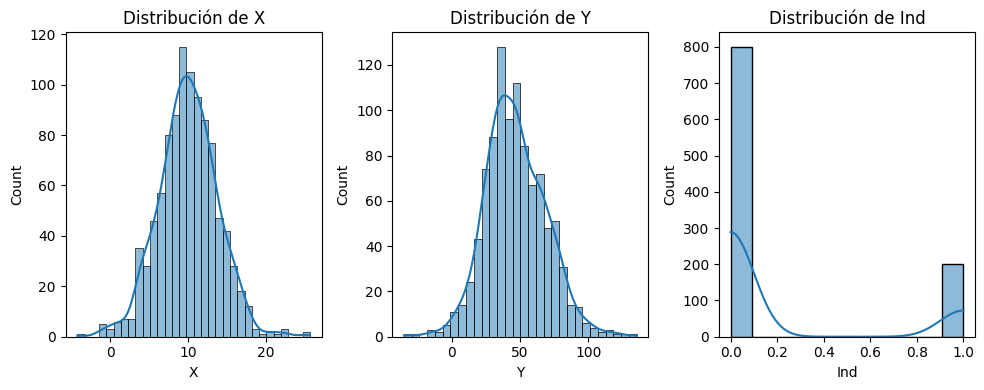

In [ ]:
#Distribución de las variables
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['X'], kde=True)
plt.title('Distribución de X')
#Asimetrica a la derecha

plt.subplot(1, 3, 2)
sns.histplot(df['Y'], kde=True)
plt.title('Distribución de Y')
#Asimetrica a la derecha

plt.subplot(1, 3, 3)
sns.histplot(df['Ind'], kde=True)
plt.title('Distribución de Ind')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


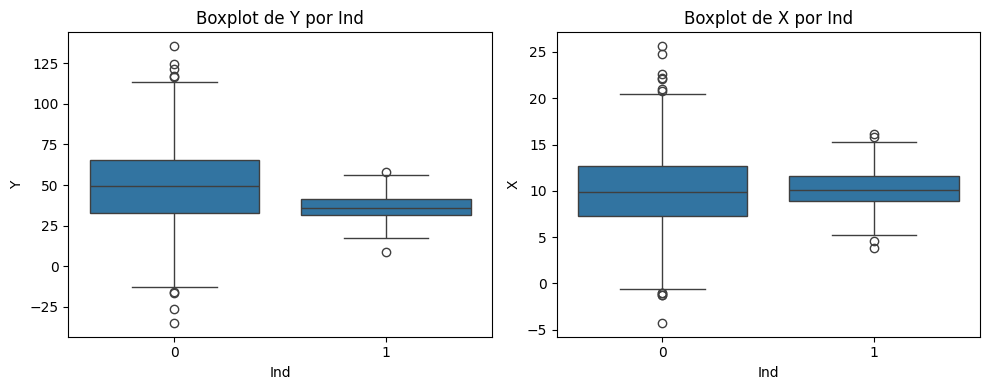

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x='Ind', y='Y', data=df)
plt.title('Boxplot de Y por Ind')

plt.subplot(1, 2, 2)
sns.boxplot(x='Ind', y='X', data=df)
plt.title('Boxplot de X por Ind')

plt.tight_layout()
plt.show()

In [ ]:
df_ind_0 = df[df['Ind'] == 0][['X','Y']].describe()
df_ind_1 = df[df['Ind'] == 1][['X','Y']].describe()

print(df_ind_0)
print(" ")
print(df_ind_1)

                X           Y
count  800.000000  800.000000
mean     9.931600   49.567376
std      4.055795   23.594228
min     -4.263757  -34.894319
25%      7.281930   32.993351
50%      9.873947   49.562809
75%     12.661513   65.509785
max     25.628678  135.542574
 
                X           Y
count  200.000000  200.000000
mean    10.157892   36.499253
std      2.232061    8.214723
min      3.821281    8.663725
25%      8.865269   31.619189
50%     10.118529   36.079339
75%     11.654149   41.560675
max     16.169568   58.087413


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


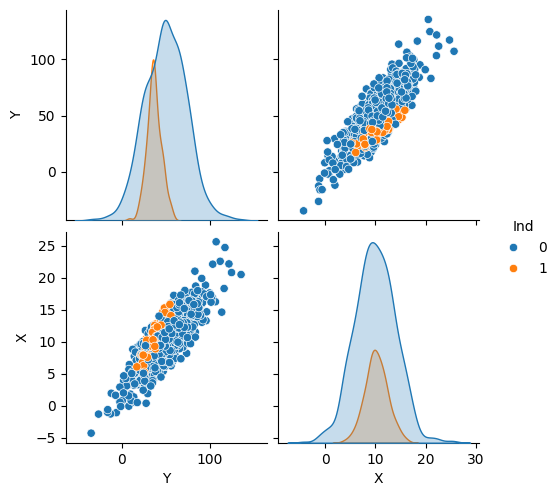

In [ ]:
sns.pairplot(df, hue='Ind')

In [ ]:
correlation_pearson = df.corr()
correlation_spearman = df.corr('spearman')
correlation_Kendall = df.corr('kendall')
print("Matriz de correlación de Pearson")
print(correlation_pearson)
print(" ")
print("Matriz de correlación de Spearman")
print(correlation_spearman)
print(" ")
print("Matriz de correlación de Kendall")
print(correlation_Kendall)

Matriz de correlación de Pearson
            Y         X       Ind
Y    1.000000  0.832057 -0.237224
X    0.832057  1.000000  0.024069
Ind -0.237224  0.024069  1.000000
 
Matriz de correlación de Spearman
            Y         X       Ind
Y    1.000000  0.803893 -0.275985
X    0.803893  1.000000  0.028111
Ind -0.275985  0.028111  1.000000
 
Matriz de correlación de Kendall
            Y         X       Ind
Y    1.000000  0.610515 -0.225454
X    0.610515  1.000000  0.022964
Ind -0.225454  0.022964  1.000000


Los análisis de correlación con diferentes métodos
(Pearson, Spearman y Kendall) indican que:

 -Existe una relación fuerte positiva entre las variables X y Y. Pearson 0.83, Spearman 0.80.

 -Existe una correlación negativa entre Ind y Y, aunque es débil. Podría sugerir que Ind puede influir en Y, y por tanto, incluirla nos permite identificar el efecto.

In [ ]:
import statsmodels.api as sm
# Definir las variables independientes (X e Ind) y la variable dependiente (Y)
X_vars = df[['X', 'Ind']]
Y = df['Y']
# Agregar una constante (intercepto) al modelo
X_vars = sm.add_constant(X_vars)
# Ajustar el modelo de regresión lineal
modelo_sin_interaccion = sm.OLS(Y, X_vars).fit()

print(modelo_sin_interaccion.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          2.25e-308
Time:                        23:11:48   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7873      0.984      0.800      0.4

La estructura del dataset es adecuada para una regresión lineal, debido a la naturaleza de las variables: contiene una variable dependiente continua (Y), una variable independiente continua (X) y una variable categórica binaria (Ind).

A grandes rasgos, se obtienen los siguientes resultados de la regresión:

-Las variables X e Ind son significativas dado su p-valor, el intercepto no lo es y el modelo explica el 75,9%. Ind: Cuando Ind cambia de 0 a 1, el valor esperado de Y disminuye 14.179 unidades. X: Por cada unidad adicional en X Y aumenta en 4.91 unidades. Intercepto: 0.787 cuando x=0.

-Durbin-Watson: 1.997 indica que no hay evidencia de autocorrelación en los residuos.

-F-estadístico: 1566 sugiere que hay una relación lineal significativa,con un p-valor cercano a 0.

-Jarque-Bera (JB): El p-valor es > alpha, por tanto, no existe sufiente evidencia para rechazar la hipótesis nula, por tanto, los residuos son normales.


1.2 Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto*

Text(0.5, 1.0, 'Scatterplot de X vs Y')

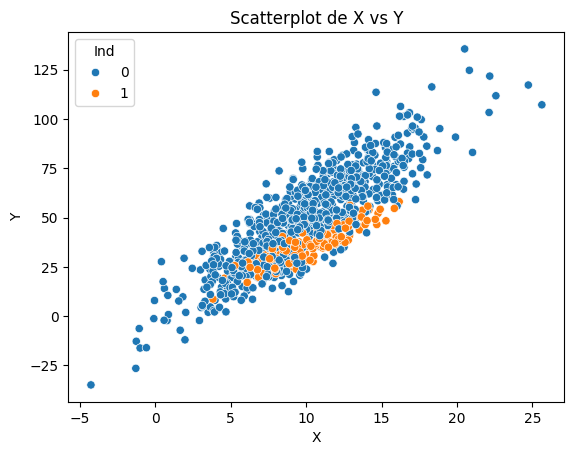

In [ ]:
X = df['X']
Y = df['Y']
sns.scatterplot(x=X, y=Y, hue = df["Ind"])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot de X vs Y')

El gráfico sugiere que, un incremento en la variable X implica un aumento en Y (relación lineal positiva). Adicionalmente, el rango en el que se mueven los datos cuando Ind = 0, es mayor al de los datos cuando Ind = 1. Para determinar si hay evidencia muestral, se procede a evaluar un modelo sin interacciones y con interacciones.

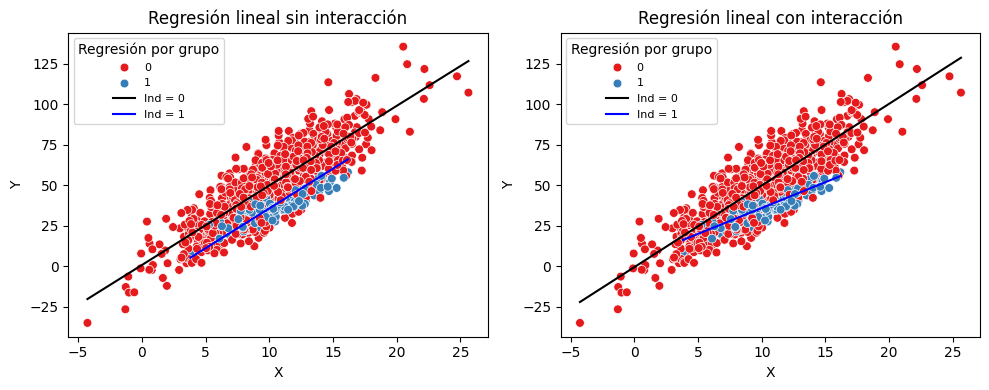

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf

# Crear una figura con dos subgráficos (1 fila, 2 columnas), con el mismo tamaño de puntos
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Mantengo el tamaño de la figura más pequeña

# Ajustamos el modelo sin interacción
modelo_sin_interaccion = smf.ols(formula='Y ~ X + Ind', data=df).fit()
# Primer gráfico: Modelo sin interacción
# Hacemos predicciones separadas para cada grupo de 'Ind'
df['predicted_sin_interaccion_0'] = modelo_sin_interaccion.predict(df[df['Ind'] == 0])
df['predicted_sin_interaccion_1'] = modelo_sin_interaccion.predict(df[df['Ind'] == 1])
# Gráfico de dispersión para el modelo sin interacción con tamaño de puntos más pequeño
sns.scatterplot(data=df, x='X', y='Y', hue='Ind', palette='Set1', edgecolor='w', s=40, ax=axes[0])  # Ajustamos el tamaño de los puntos a s=40
# Graficar las líneas de regresión ajustadas para cada grupo de 'Ind'
sns.lineplot(x='X', y='predicted_sin_interaccion_0', data=df[df['Ind'] == 0], color='black', label='Ind = 0', ax=axes[0])
sns.lineplot(x='X', y='predicted_sin_interaccion_1', data=df[df['Ind'] == 1], color='blue', label='Ind = 1', ax=axes[0])
# Añadir título y etiquetas
axes[0].set_title('Regresión lineal sin interacción', fontsize=12)
axes[0].set_xlabel('X', fontsize=10)
axes[0].set_ylabel('Y', fontsize=10)
# Mostrar leyenda
axes[0].legend(title='Regresión por grupo', title_fontsize='10', fontsize='8', loc='upper left')

# Segundo gráfico: Modelo con interacción

# Ajustamos el modelo con interacción
modelo_con_interaccion = smf.ols(formula='Y ~ X * Ind', data=df).fit()
# Hacemos predicciones separadas para cada grupo de 'Ind'
df['predicted_con_interaccion_0'] = modelo_con_interaccion.predict(df[df['Ind'] == 0])
df['predicted_con_interaccion_1'] = modelo_con_interaccion.predict(df[df['Ind'] == 1])
# Gráfico de dispersión para el modelo con interacción con el mismo tamaño de puntos
sns.scatterplot(data=df, x='X', y='Y', hue='Ind', palette='Set1', edgecolor='w', s=40, ax=axes[1])  # Ajustamos el tamaño de los puntos a s=40
# Graficar las líneas de regresión ajustadas para cada grupo de 'Ind'
sns.lineplot(x='X', y='predicted_con_interaccion_0', data=df[df['Ind'] == 0], color='black', label='Ind = 0', ax=axes[1])
sns.lineplot(x='X', y='predicted_con_interaccion_1', data=df[df['Ind'] == 1], color='blue', label='Ind = 1', ax=axes[1])
# Añadir título y etiquetas
axes[1].set_title('Regresión lineal con interacción', fontsize=12)
axes[1].set_xlabel('X', fontsize=10)
axes[1].set_ylabel('Y', fontsize=10)
# Mostrar leyenda
axes[1].legend(title='Regresión por grupo', title_fontsize='10', fontsize='8', loc='upper left')


plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm
# Crear un término de interacción entre X e Ind
df['X_Ind_interaction'] = df['X'] * df['Ind']
# Definir las variables independientes incluyendo la interacción
X_vars_con_interaccion = df[['X', 'Ind', 'X_Ind_interaction']]
Y = df['Y']
# Agregar una constante (intercepto) al modelo
X_vars_con_interaccion = sm.add_constant(X_vars_con_interaccion)
# Ajustar el modelo de regresión lineal con interacción
modelo_con_interaccion = sm.OLS(Y, X_vars_con_interaccion).fit()
# Mostrar el resumen del modelo
print(modelo_con_interaccion.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          1.34e-312
Time:                        23:14:45   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4991      1.00

El modelo con interacción muestra que tenemos rectas con pendientes diferentes e intersección. Estas rectas se ajustan a los datos observados, permitiendo un mejor panorama para predecir la variable Y, al capturar mejor las diferencias entre los dos grupos. Además, de acuerdo con los resultados del modelo de regresión con interacción, la variable con interacción es estadísticamente significativa dado su p-valor.


La formula quedaría de la siguiente forma:

Y = β0 + β1 X + β2 Ind + β3 (X Ind)

Y = -0.4991 + 5.0411 X + 4.5491 Ind - 1.8466 (X Ind)

In [ ]:
residuals = modelo_con_interaccion.resid
residuals.head()

,0
0,2.908989
1,3.450871
2,4.686263
3,2.383929
4,10.895744


TtestResult(statistic=-5.56737193353094e-14, pvalue=0.9999999999999556, df=999)


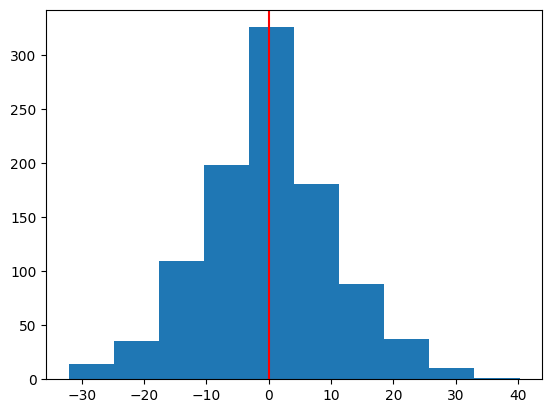

In [ ]:
## 1) Media cero en los residales
from scipy.stats import ttest_1samp
## H0: E[e_i] = 0 vs H1: E[e_i] != 0
print(ttest_1samp(residuals, 0))

plt.hist(residuals)
plt.axvline(np.mean(residuals), color = "red")
plt.show()

Se cumple media Cero

ShapiroResult(statistic=0.9961399539741611, pvalue=0.013784609851128341)
KstestResult(statistic=0.38786995792230733, pvalue=6.035150462603215e-136, statistic_location=-2.0939988335882624, statistic_sign=1)
AndersonResult(statistic=1.580915878804035, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-1.8815171642927454e-14, scale=10.687052646925942)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
SignificanceResult(statistic=4.811263115173203, pvalue=0.09020850574930724)


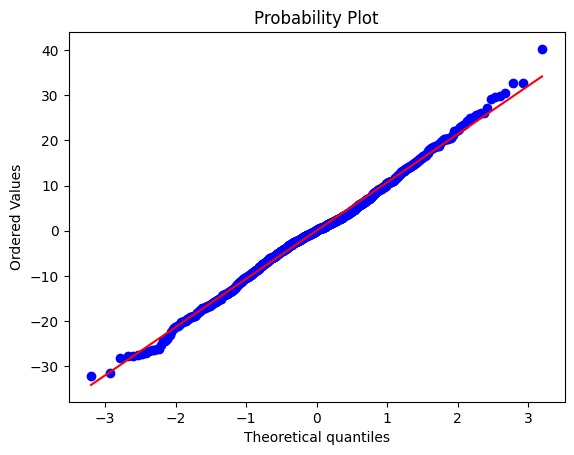

In [ ]:
## 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot
import pylab

print(shapiro(residuals))
print(kstest(residuals, "norm"))
print(anderson(residuals))
print(jarque_bera(residuals))

### Grafico QQ-plot para Normalidad
probplot(residuals, dist = "norm", plot = pylab)
plt.show()

## Normalidad:

1. Por Shapiro Wilks: Como p_valor < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5%, se rechaza la hipotesis nula por lo tanto suponemos que no hay normalidad en los datos. NO NORMALIDAD.

2. Por Kolmogorov-Smirnov: Como p_valor < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% EXISTE evidencia suficiente para  rechazar la hipotesis nula por lo tanto NO suponemos Normalidad en los datos. NO NORMALIDAD.

3. Por Anderson-Darling: Como es el estadistico de prueba 1.5809 es mayor al estadistico critico 0.784, el estadistico de prueba cae en región de Rechazo, por lo tanto existe evidencia muestral suficiente para rechazar H0 y podemos suponer que no hay normalidad en los datos. NO NORMALIDAD.

4. Por Jarque-Bera: Como p_valor > $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5%  no existe evidencia suficiente para  rechazar la hipotesis nula por lo tanto suponemos normalidad en los datos.

1.984805425927445


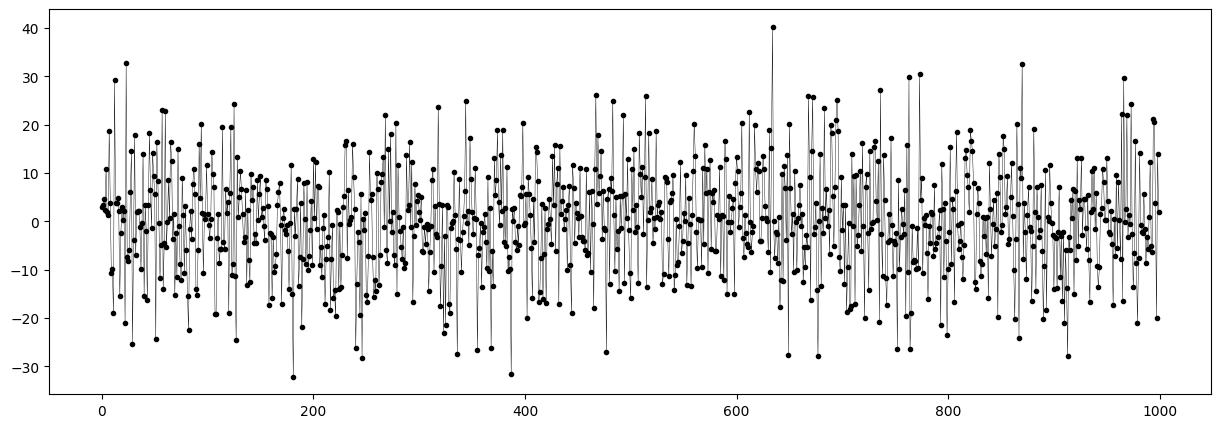

In [ ]:
### 3) Independencia en los residuales (Test de autocorrelacion)
from statsmodels.stats.stattools import durbin_watson
### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print(durbin_watson(residuals))
### Interpretación: Si el valor DW esta en el intervalo [1.5, 2.5] No rechazo la hipotesis nula
### En caso contrario si DW < 1.5 O DW > 2.5 se rechaza H0.

plt.figure(figsize = (15, 5))
plt.plot(residuals, '.-', color = "black", linewidth = 0.3)

Como DW= 1.9848 cae dentro del rango [1.5, 2.5], indica que no hay suficiente evidencia para rechazar la hipótesis nula de independencia de los residuos. Por lo tanto, los residuos no presentan autocorrelación, es decir, son independientes.

In [ ]:
### 4) Test de homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
### H0: V[e_i] = cte vs H1: V[e_i] != cte

het_breuschpagan(residuals, sm.add_constant(X_vars_con_interaccion))


(83.04028836791721,
 6.835236597869036e-18,
 30.06607093901456,
 1.3067597184142322e-18)

No se cumple Homocedasticidad dado que el p-valor es < al alpha de 0.05, por tanto, los residuos no tienen varianza constante

**PUNTO 2.** Considere el conjunto de datos “data2” del fichero data_exam1.xlsx. De acuerdo al análisis del ítem anterior proponga una transformación (raiz, potencia, logarítmica, sinusoidal, etc.) para alguna de las variables y justifique por qué.

In [ ]:
df = pd.read_excel('data_exam1.xlsx', sheet_name='data2')
df.head(5)

,Y,X
0,12.189142,0.226957
1,12.187456,0.088938
2,11.782692,0.199069
3,5.732032,0.003812
4,7.026970,0.004573


In [ ]:
print(df.info())
print('-'*100)
print(df.describe())
print('-'*100)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
None
----------------------------------------------------------------------------------------------------
                 Y             X
count  1000.000000  1.000000e+03
mean      9.445622  7.234805e-02
std       3.908189  9.753985e-02
min     -12.073239  1.343729e-08
25%       7.411486  8.450417e-03
50%      10.072134  3.655172e-02
75%      12.082546  9.992523e-02
max      17.838788  9.397465e-01
----------------------------------------------------------------------------------------------------
Y    0
X    0
dtype: int64


In [ ]:
print(f'Pearson: \n{df.corr()}')
print('-'*40)
print(f'Spearman: \n{df.corr(method="spearman")}')
print('-'*40)
print(f'Kendall: \n{df.corr(method="kendall")}')

Pearson: 
          Y         X
Y  1.000000  0.520376
X  0.520376  1.000000
----------------------------------------
Spearman: 
          Y         X
Y  1.000000  0.767833
X  0.767833  1.000000
----------------------------------------
Kendall: 
          Y         X
Y  1.000000  0.580777
X  0.580777  1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


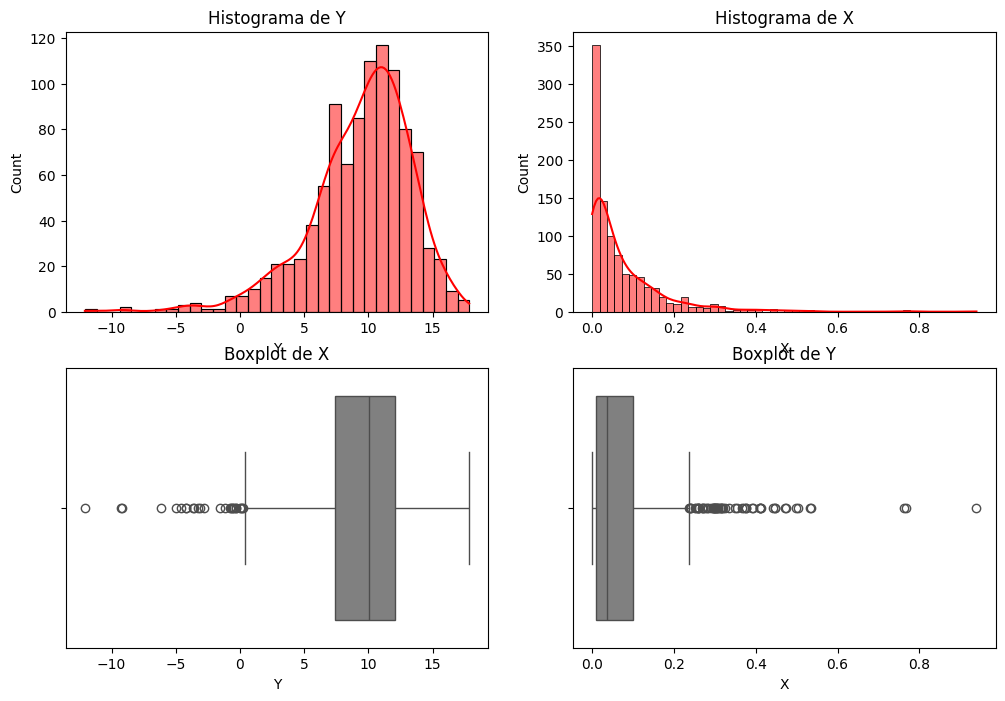

In [ ]:
# Crear subplots de 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#Ydistribution
sns.histplot(df['Y'], kde=True, color='red', ax=axs[0, 0])
axs[0, 0].set_title('Histograma de Y')

#Xdistribution
sns.histplot(df['X'], kde=True, color='red', ax=axs[0, 1])
axs[0, 1].set_title('Histograma de X')

#Boxplot
sns.boxplot(x=df['Y'], color='gray', ax=axs[1, 0])
axs[1, 1].set_title('Boxplot de Y')

#Boxplot
sns.boxplot(x=df['X'], color='gray', ax=axs[1, 1])
axs[1, 0].set_title('Boxplot de X')

# Mostrar la figura
plt.show()

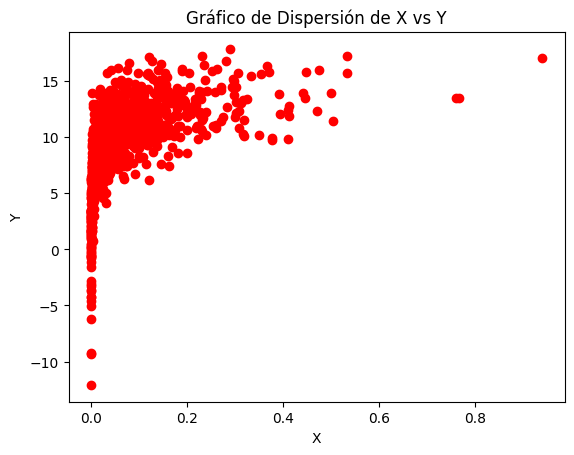

In [ ]:
plt.scatter(df['X'], df['Y'], color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión de X vs Y')
plt.show()

Análisis exploratorio:

Se validó el dataframe en el cual se econtraron 1000 datos, ningún valor nulo.

Variable Y:

Presenta ligeramente una asimetría negativa con valores cercanos a 10, además de múltiples valores atipicos hacía la izquierda.

Variable X:

Presenta una concentración en valores cercanos a 0 y su mediana está muy cerca del límite inferior, por lo que presenta asimetria positiva, por último, posee valores atipicos hacía la derecha.

Correlación: Se validan las diferentes correlaciones, pearson (0.52), spearman (0.76) y kendall (0.58). En todas al menos existe una correlación moderada y positiva entre las variables, aunque la correlación de spearman es un valor mucho más alto (fuerte) lo que nos indica que una relación posiblemente no lineal describiría mejor los datos y sus relaciones.

Con el gráfico de dispersión entre X y Y no se logra visualizar una relación lineal, existe una gran concentración en los valores bajos.


In [ ]:
from scipy import stats

# Transformaciones a Y
df['Y_exp'] = np.exp(df['Y'])
df['Y_raiz'] = np.sqrt(df['Y'])
df['Y_log'] = np.log(df['Y'])

# Transformaciones a X
df['X_exp'] = np.exp(df['X'])
df['X_raiz'] = np.sqrt(df['X'])
df['X_log'] = np.log(df['X'])
df['X_boxcox'], fitted_lambda = stats.boxcox(df['X'] + 1.343729e-08)

# Listar las columnas que quieres visualizar
columnas_a_visualizar = ['Y' ,'Y_exp', 'Y_raiz', 'Y_log', 'Y','X','X_exp', 'X_raiz', 'X_log', 'X_boxcox']

# Crear una figura con 2 filas y 3 columnas de subplots
fig, axes = plt.subplots(2, 5, figsize=(16, 6))

# Iterar sobre las columnas y crear los histogramas
for i, columna in enumerate(columnas_a_visualizar):
    row = i // 5
    col = i % 5
    sns.histplot(df[columna], kde=True, color='red', ax=axes[row, col])
    axes[row, col].set_title(f'Histograma de {columna}')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Data must be positive.

NameError: name 'columnas_a_visualizar' is not defined

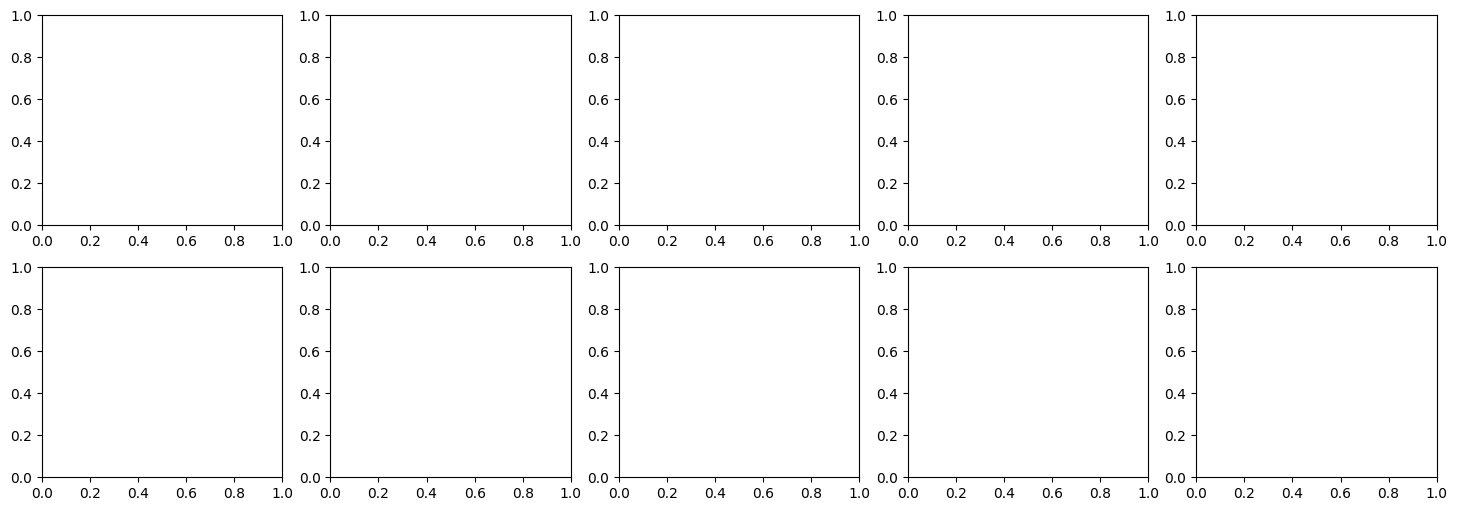

In [ ]:
# Crear una figura con 2 filas y 3 columnas de subplots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Iterar sobre las columnas y crear los Q-Q plots
for i, columna in enumerate(columnas_a_visualizar):
    row = i // 5
    col = i % 5
    stats.probplot(df[columna], dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f"Q-Q plot para {columna}")

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

ValueError: Could not interpret value `X_boxcox` for `x`. An entry with this name does not appear in `data`.

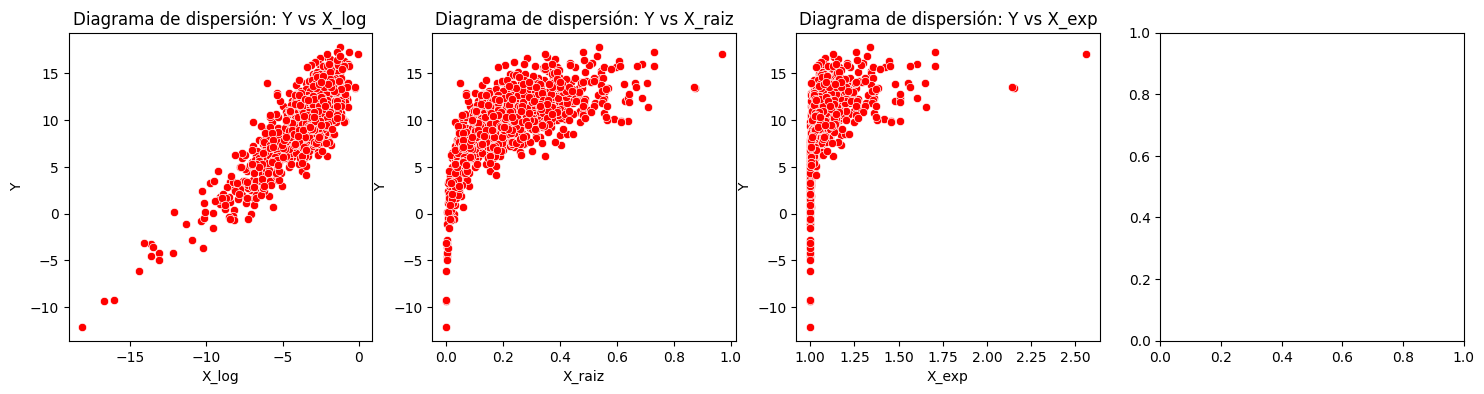

In [ ]:
# Listar las columnas que quieres visualizar en los diagramas de dispersión
columnas_a_visualizar = ['X_log', 'X_raiz', 'X_exp', 'X_boxcox']

# Crear una figura con una fila y 4 columnas de subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Iterar sobre las columnas y crear los diagramas de dispersión
for i, columna in enumerate(columnas_a_visualizar):
    # Solo necesitamos un índice para acceder a los subplots en una sola fila
    sns.scatterplot(data=df, x=columna, y='Y', ax=axes[i], color = 'red')
    axes[i].set_title(f"Diagrama de dispersión: Y vs {columna}")

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

In [ ]:
# Test de Shapiro-Wilk
print(stats.shapiro(df['X']))
print(stats.shapiro(df['X_exp']))
print(stats.shapiro(df['X_raiz']))
print(stats.shapiro(df['X_log']))
print(stats.shapiro(df['X_boxcox']))

print('-'*100)

# Test de Shapiro-Wilk
print(stats.shapiro(df['Y']))
print(stats.shapiro(df['Y_exp']))
print(stats.shapiro(df['Y_log']))
print(stats.shapiro(df['Y_raiz']))

NameError: name 'stats' is not defined

Se gestionan las transformaciones de las distintas variables con base a sus carácteristicas, se busca para X transformaciones que hagan crecer los valores inferiores y acote los valores superiores, por su parte para Y, se deben gestionar transformaciones que opriman la cola y ayuden a limitar esa asimetría negativa.

Se gestionaron las transformaciones:

- Raíz
- Exponencial
- Logaritmo
- Box cox

Después de las transformaciones se verifican las nuevas variables, identificando su nivel de normalidad, para lo que se gráfico el histograma, un Q-Q plot y el test de shapiro-Wilk para identificar que transformación tenía un mayor comportamiento normal, aún así ninguno mostró mayor comportamiento normal según Shapiro Wilk, dado que se rechaza H0. Sin embargo, visualizando los gráficos se muestra que Xbox_cox es la que mejor comportamiento posee, por lo tanto se escoge para su uso en el modelo de regresión.

2.2 Dado lo anterior, proponga un modelo de regresión lineal, interpretelo y valide los supuestos del modelo.

In [ ]:
model = smf.ols('Y~X_boxcox',data=df).fit()
print(model.summary())

PatsyError: Error evaluating factor: NameError: name 'X_boxcox' is not defined
    Y~X_boxcox
      ^^^^^^^^

In [ ]:
t_stat, p_value = stats.ttest_1samp(residuos, 0)

# 3. Imprimir los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

In [ ]:
# Calcular la media de los residuos
media_residuos = np.mean(residuos)

# Graficar el histograma
sns.histplot(residuos, kde=True)
plt.axvline(media_residuos, color='red', linestyle='--', label=f'Media: {media_residuos:.2f}')
plt.title('Histograma de los residuos')
plt.legend()
plt.show()

In [ ]:
residuos = model.resid

print(shapiro(residuos))
print(kstest(residuos, "norm"))
print(anderson(residuos))
print(jarque_bera(residuos))

In [ ]:
X = model.model.exog  # Matriz de las variables explicativas

# Test de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X)

# Mostrar resultados del test
bp_stat = bp_test[0]     # Estadístico de Breusch-Pagan
bp_pvalue = bp_test[1]   # p-valor del test

print(f"Estadístico Breusch-Pagan: {bp_stat}")
print(f"p-valor: {bp_pvalue}")

In [ ]:
fitted_values = model.fittedvalues  # Valores ajustados
sns.scatterplot(x=fitted_values, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Valores ajustados')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuos)
plt.title('Gráfico ACF de los residuos')
plt.show()

In [ ]:
x_vals = np.linspace(df['X_boxcox'].min(), df['X_boxcox'].max(),100)
pred_Y_ind_0 = model.params['Intercept'] + model.params['X_boxcox'] * x_vals
plt.scatter(df['X_boxcox'],df['Y'], color='red', label='Ind=1', s=5)
plt.plot(x_vals,pred_Y_ind_0,color='black',linewidth=2,label='Regresión Ind = 0')
plt.title(f'Moodelo para X_boxcox')
plt.show()

Según los resultados del modelo tenemos que:

Un R**2 del 0.632 lo que indica que el modelo en buena medida explica la variación de Y, lo explica en un 63,2%, tenemos un B0 con un valor de 19.05, lo que implica que cuándo Xbox_cox es cero se espera un valor de 19 para Y, este es estadisiticamente significativo, aunque no es lo que sucede en realidad porque cuándo X es cero los valores de Y se centran entre -15 y 15.

Por su parte la variable Xbox_cox tiene un valor de su coeficiente de 4.0992, lo que implica que ante un amento en una unidad en Xbox_cox se espero que Y aumente en 4.0992, esta variable también es estadisticamente significativa.

Por su parte los supuestos del modelo:

1) Media de los errores = 0 - One Sample t-test con un valor -8.050827308008641e-14, por lo tanto, no rechazo H0, lo que implica que la media no es muy distinta de 0.

2) Normalidad de los errores - Jarque-Bera con una valor de 2.61e-39, lo que hace rechazar H0, por lo que indica que los residuos no siguen una distribución normal.

Con el histograma de los residuos, se puede observar una distribución cuasinormal, pero se ve que posee una asimetria negativa, por otro lado, se corrobora el valor de la prueba one sample t-test dado que la media de los residuos si se encuentra en 0.

3) Independencia en los residuos - Durbin Watson nos muestra un valor de 2.05 indica que no hay autocorrelación en los residuos del modelo.

4) Homocedasticidad - Breusch Pagan con un valor de 6.295721262980711e-07, para esta prueba de hipotesis se rechaza a H0, o sea, hay evidencia de heterocedasticidad.

Por su parte los gráficos de ACF y residuos vs valores ajustados, muestran un comportamiento que puede ser visualizado como homocedastico, no existe un patrón de aumentó o disminución, la mayoría están cerca de 0.

**PUNTO 3.**

In [ ]:
pip install xlrd

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

datos= pd.read_excel("datos.xls", sheet_name="Wine Quality", header= 2)
datos=datos.drop(columns=['pH', 'Sulfatos', 'Cloruros', 'Acidez Volátil', 'Acidez Fija', 'Calidad del Vino'])
display(datos)
display(datos.describe())
display(datos.info())

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,0.36,20.7,45.0,170.0,1.00100,8.8
1,0.34,1.6,14.0,132.0,0.99400,9.5
2,0.40,6.9,30.0,97.0,0.99510,10.1
3,0.32,8.5,47.0,186.0,0.99560,9.9
4,0.32,8.5,47.0,186.0,0.99560,9.9
...,...,...,...,...,...,...
4893,0.29,1.6,24.0,92.0,0.99114,11.2
4894,0.36,8.0,57.0,168.0,0.99490,9.6
4895,0.19,1.2,30.0,111.0,0.99254,9.4
4896,0.30,1.1,20.0,110.0,0.98869,12.8


,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.334192,6.391415,35.308085,138.360657,0.994027,10.514267
std,0.121020,5.072058,17.007137,42.498065,0.002991,1.230621
min,0.000000,0.600000,2.000000,9.000000,0.987110,8.000000
25%,0.270000,1.700000,23.000000,108.000000,0.991723,9.500000
50%,0.320000,5.200000,34.000000,134.000000,0.993740,10.400000
75%,0.390000,9.900000,46.000000,167.000000,0.996100,11.400000
max,1.660000,65.800000,289.000000,440.000000,1.038980,14.200000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ácido Cítrico            4898 non-null   float64
 1   Azúcar Residual          4898 non-null   float64
 2   Dióxido de Azúfre Libre  4898 non-null   float64
 3   Dióxido de Azúfre Total  4898 non-null   float64
 4   Densidad                 4898 non-null   float64
 5   Alcohol                  4898 non-null   float64
dtypes: float64(6)
memory usage: 229.7 KB


None

# Análisis Descriptivo

Se realiza la lectura de los datos y se analizan descriptivamente el archivo. Se observa que no hayan datos nulos.

Adicional se realiza la depuración de las columnas que no vamos a necesitar para el estudio de los datos (pH,Sulfatos, Cloruros, Acidez Volátil, Acidez Fija y Calidad de Vino.).

Hay 4.898 datos, no se encuentran datos nulos, todos los datos son de tipo float.

El estudio se llevará a cabo con las variables Ácido Cítrico, Azúcar Residual, Dióxido de Azúfre Libre,	Dióxido de Azúfre, Densidad, Alcohol.

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
0,0.213280,2.821349,0.569932,0.744565,2.331512,-1.393152
1,0.048001,-0.944765,-1.253019,-0.149685,-0.009154,-0.824276
2,0.543838,0.100282,-0.312141,-0.973336,0.358665,-0.336667
3,-0.117278,0.415768,0.687541,1.121091,0.525855,-0.499203
4,-0.117278,0.415768,0.687541,1.121091,0.525855,-0.499203
...,...,...,...,...,...,...
4893,-0.365197,-0.944765,-0.664970,-1.091000,-0.965483,0.557282
4894,0.213280,0.317179,1.275590,0.697499,0.291789,-0.743008
4895,-1.191592,-1.023637,-0.312141,-0.643875,-0.497350,-0.905544
4896,-0.282557,-1.043355,-0.900190,-0.667408,-1.784717,1.857572


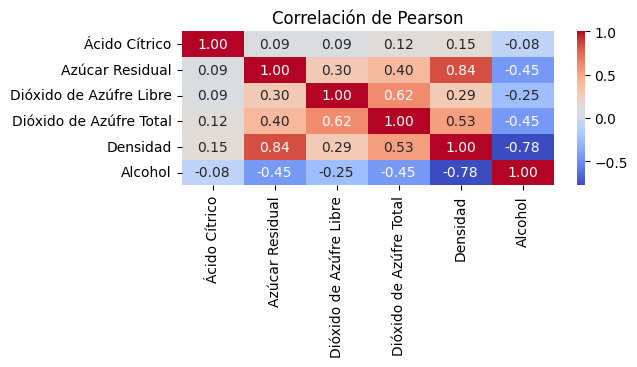

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
Ácido Cítrico,1.000000,0.094212,0.094077,0.121131,0.149503,-0.075729
Azúcar Residual,0.094212,1.000000,0.299098,0.401439,0.838966,-0.450631
Dióxido de Azúfre Libre,0.094077,0.299098,1.000000,0.615501,0.294210,-0.250104
Dióxido de Azúfre Total,0.121131,0.401439,0.615501,1.000000,0.529881,-0.448892
Densidad,0.149503,0.838966,0.294210,0.529881,1.000000,-0.780138
Alcohol,-0.075729,-0.450631,-0.250104,-0.448892,-0.780138,1.000000


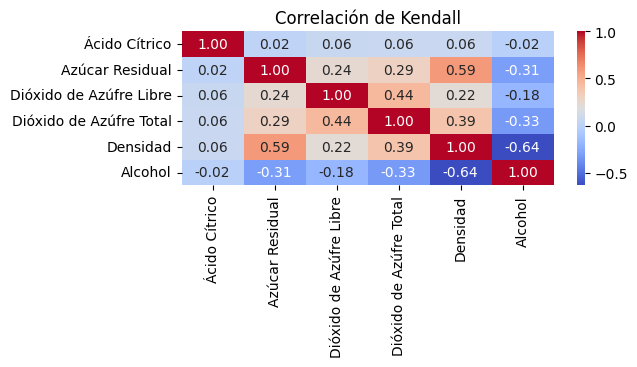

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
Ácido Cítrico,1.000000,0.015329,0.060809,0.062188,0.061542,-0.019981
Azúcar Residual,0.015329,1.000000,0.236748,0.293319,0.588989,-0.305601
Dióxido de Azúfre Libre,0.060809,0.236748,1.000000,0.444696,0.217295,-0.182539
Dióxido de Azúfre Total,0.062188,0.293319,0.444696,1.000000,0.388378,-0.325826
Densidad,0.061542,0.588989,0.217295,0.388378,1.000000,-0.635104
Alcohol,-0.019981,-0.305601,-0.182539,-0.325826,-0.635104,1.000000


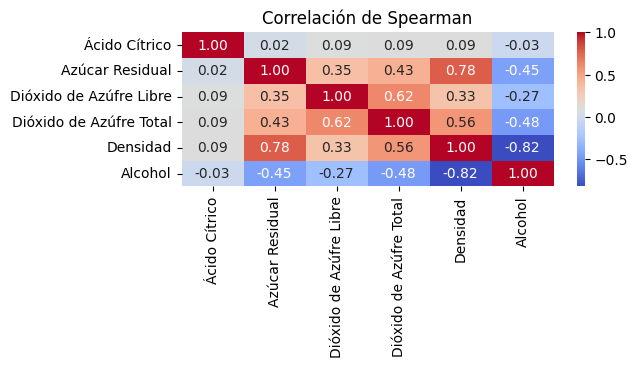

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
Ácido Cítrico,1.000000,0.024621,0.088314,0.093219,0.091425,-0.029170
Azúcar Residual,0.024621,1.000000,0.346107,0.431252,0.780365,-0.445257
Dióxido de Azúfre Libre,0.088314,0.346107,1.000000,0.618616,0.327822,-0.272569
Dióxido de Azúfre Total,0.093219,0.431252,0.618616,1.000000,0.563824,-0.476619
Densidad,0.091425,0.780365,0.327822,0.563824,1.000000,-0.821855
Alcohol,-0.029170,-0.445257,-0.272569,-0.476619,-0.821855,1.000000


Pearson   Kendall  Spearman
Ácido Cítrico           Ácido Cítrico            1.000000  1.000000  1.000000
                        Azúcar Residual          0.094212  0.015329  0.024621
                        Dióxido de Azúfre Libre  0.094077  0.060809  0.088314
                        Dióxido de Azúfre Total  0.121131  0.062188  0.093219
                        Densidad                 0.149503  0.061542  0.091425
                        Alcohol                 -0.075729 -0.019981 -0.029170
Azúcar Residual         Ácido Cítrico            0.094212  0.015329  0.024621
                        Azúcar Residual          1.000000  1.000000  1.000000
                        Dióxido de Azúfre Libre  0.299098  0.236748  0.346107
                        Dióxido de Azúfre Total  0.401439  0.293319  0.431252
                        Densidad                 0.838966  0.588989  0.780365
                        Alcohol                 -0.450631 -0.305601 -0.445257
Dióxido de Azúfre Libre Ácido Cítrico            0.094077  0.060809  0.088314
                        Azúcar Residual          0.299098  0.236748  0.346107
                        Dióxido de Azúfre Libre  1.000000  1.000000  1.000000
                        Dióxido de Azúfre Total  0.615501  0.444696  0.618616
                        Densidad                 0.294210  0.217295  0.327822
                        Alcohol                 -0.250104 -0.182539 -0.272569
Dióxido de Azúfre Total Ácido Cítrico            0.121131  0.062188  0.093219
                        Azúcar Residual          0.401439  0.293319  0.431252
                        Dióxido de Azúfre Libre  0.615501  0.444696  0.618616
                        Dióxido de Azúfre Total  1.000000  1.000000  1.000000
                        Densidad                 0.529881  0.388378  0.563824
                        Alcohol                 -0.448892 -0.325826 -0.476619
Densidad                Ácido Cítrico            0.149503  0.061542  0.091425
                        Azúcar Residual          0.838966  0.588989  0.780365
                        Dióxido de Azúfre Libre  0.294210  0.217295  0.327822
                        Dióxido de Azúfre Total  0.529881  0.388378  0.563824
                        Densidad                 1.000000  1.000000  1.000000
                        Alcohol                 -0.780138 -0.635104 -0.821855
Alcohol                 Ácido Cítrico           -0.075729 -0.019981 -0.029170
                        Azúcar Residual         -0.450631 -0.305601 -0.445257
                        Dióxido de Azúfre Libre -0.250104 -0.182539 -0.272569
                        Dióxido de Azúfre Total -0.448892 -0.325826 -0.476619
                        Densidad                -0.780138 -0.635104 -0.821855
                        Alcohol                  1.000000  1.000000  1.000000

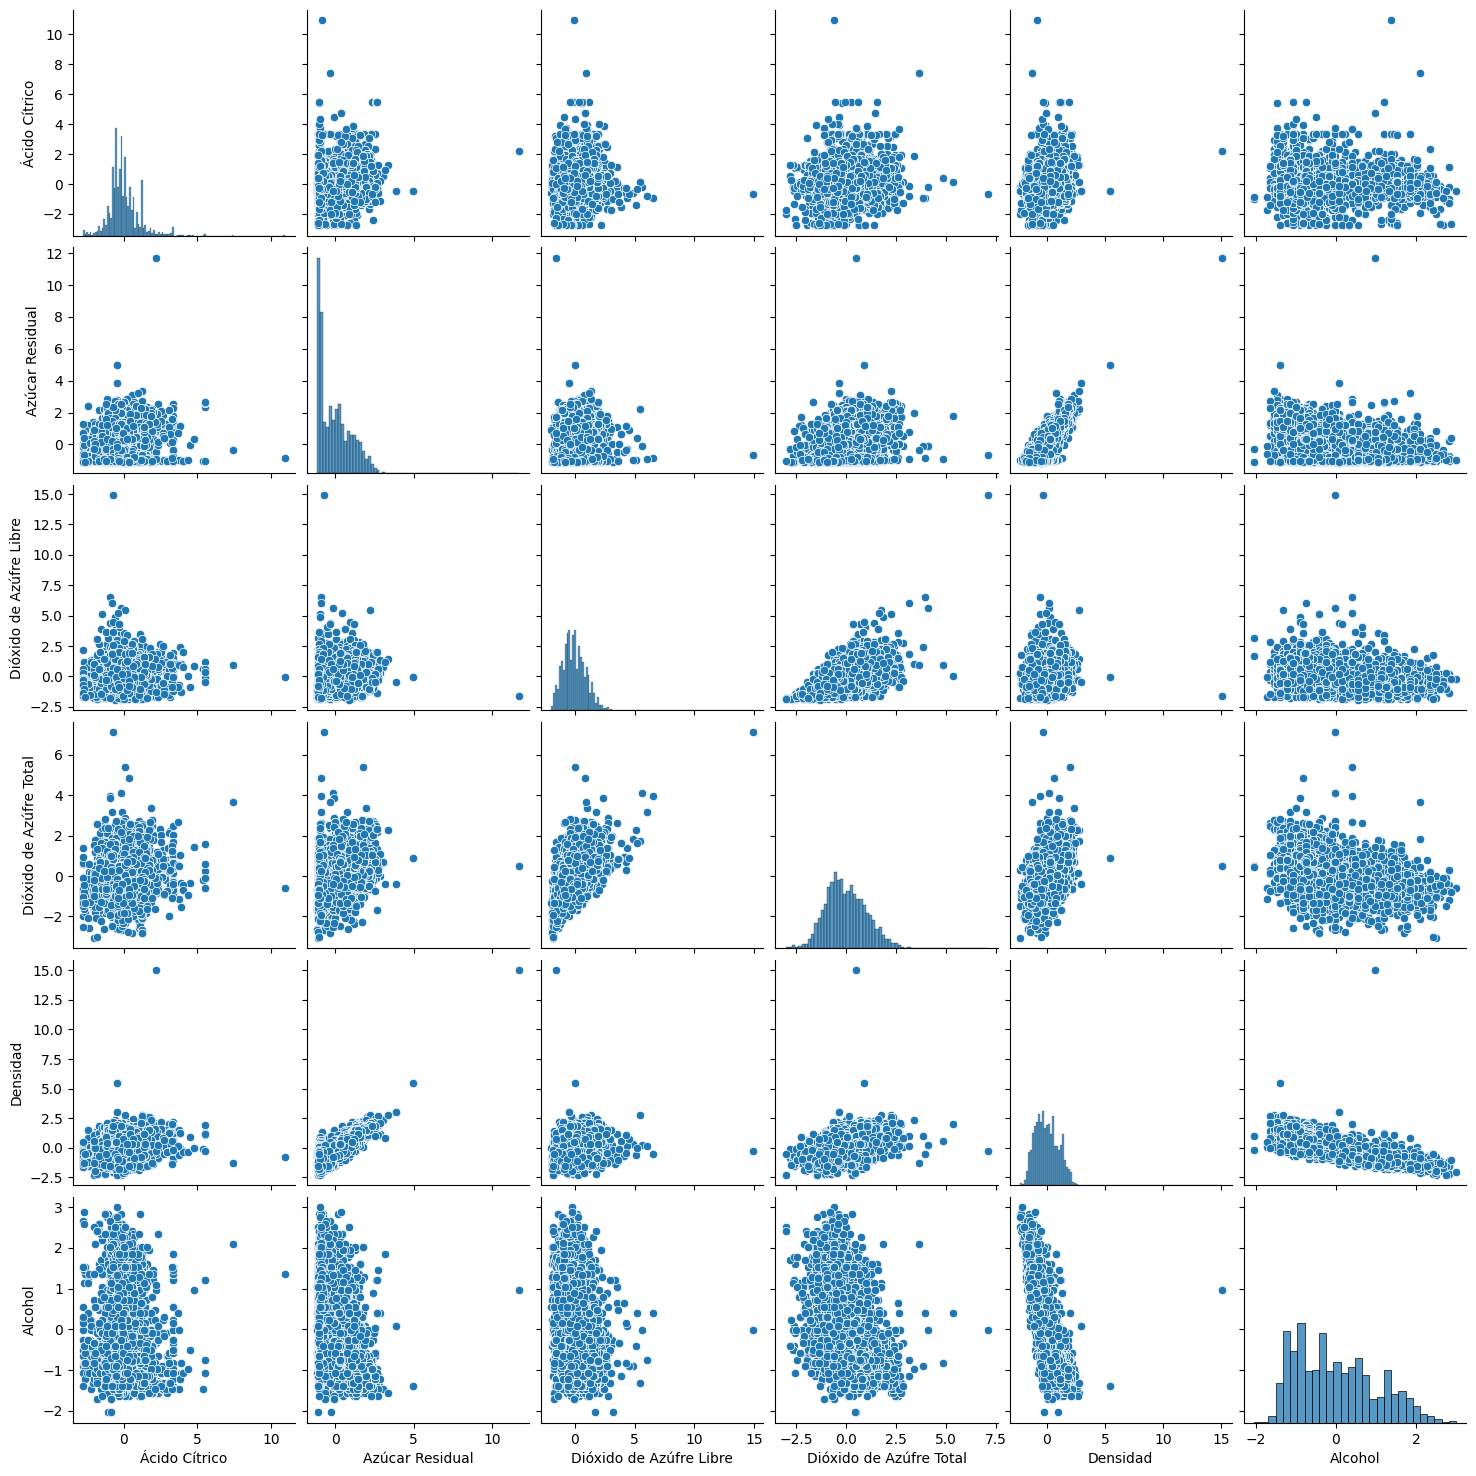

In [ ]:
scalar= StandardScaler()
datos_estandarizados= pd.DataFrame(scalar.fit_transform(datos),columns=datos.columns)
display(datos_estandarizados)

correlacion_pearson = datos_estandarizados.corr(method='pearson').reset_index(drop=True)
plt.figure(figsize=(6, 2))
sns.heatmap(correlacion_pearson, annot=True, fmt=".2f", cmap="coolwarm",xticklabels=datos_estandarizados.columns, yticklabels=datos_estandarizados.columns)
plt.title("Correlación de Pearson")
plt.show()

nuevos_nombres_indices = ['Ácido Cítrico', 'Azúcar Residual', 'Dióxido de Azúfre Libre', 'Dióxido de Azúfre Total', 'Densidad', 'Alcohol']
correlacion_pearson.index = nuevos_nombres_indices

display(correlacion_pearson)

#-----Calculando Kendall
correlacion_kendall = datos_estandarizados.corr(method='kendall').reset_index(drop=True)
plt.figure(figsize=(6, 2))
sns.heatmap(correlacion_kendall, annot=True, fmt=".2f", cmap="coolwarm",xticklabels=datos_estandarizados.columns, yticklabels=datos_estandarizados.columns)
plt.title("Correlación de Kendall")
plt.show()

nuevos_nombres_indices = ['Ácido Cítrico', 'Azúcar Residual', 'Dióxido de Azúfre Libre', 'Dióxido de Azúfre Total', 'Densidad', 'Alcohol']
correlacion_kendall.index = nuevos_nombres_indices

display(correlacion_kendall)


#-----Calculando Spearman
correlacion_spearman = datos_estandarizados.corr(method='spearman').reset_index(drop=True)
plt.figure(figsize=(6, 2))
sns.heatmap(correlacion_spearman, annot=True, fmt=".2f", cmap="coolwarm",xticklabels=datos_estandarizados.columns, yticklabels=datos_estandarizados.columns)
plt.title("Correlación de Spearman")
plt.show()

nuevos_nombres_indices = ['Ácido Cítrico', 'Azúcar Residual', 'Dióxido de Azúfre Libre', 'Dióxido de Azúfre Total', 'Densidad', 'Alcohol']
correlacion_spearman.index = nuevos_nombres_indices

display(correlacion_spearman)


#---Comparando correlaciones
comparando_correlaciones = pd.DataFrame({
'Pearson': correlacion_pearson.unstack(),
'Kendall': correlacion_kendall.unstack(),
'Spearman': correlacion_spearman.unstack()}).dropna()

display(comparando_correlaciones)

sns.pairplot(datos_estandarizados)
plt.show()

## Cálculo y Análisis de Correlaciones Pearson/Kendall/Spearman

Se define a la variable _DENSIDAD_ como la dependiente (Y), las demas variables seran tomadas como las predictoras, _Ácido Cítrico, Azúcar Residual, Dióxido de Azúfre Libre,Dióxido de Azúfre, Alcohol_.

_Pearson_: Se observa que la mayor correlación (positiva/negativa) se encuentra en las variables Densidad y Alcohol -0.78 , Densidad y Azúcar Residual 0.84

_Kendall_: Se observa que la mayor correlación (positiva/negativa)  se encuentra en las variables Densidad y Alcohol -0.64, Densidad y Azúcar Residual 0.59

_Spearman_: Se observa que la mayor correlación (positiva/negativa)  se encuentra en las variables Densidad y Alcohol -0.82, Densidad y Azúcar Residual 0.78

Se observa que se mantienen las correlaciones fuertes sin importar el metodo que se utilice entre las variables Densidad/Alcohol y Densidad/Azúcar Residual. Teniendo en cuenta las gráficas, se ve que las variables que presentan correlación positiva/negativa, tienen la forma elipsoide con algunos puntos atipicos pero podriamos suponer un comportamiento de linealidad.

## Para empezar con el modelado, se tiene en cuenta:

$$ \hat{\beta} = \hat{\Sigma}_{XX}^{-1}\hat{\Sigma}_{XY}$$

$$\hat{\beta_0}=\bar{y}-\bar{X}^\top\hat{\beta}^{[0]}$$

In [ ]:
y= datos_estandarizados['Densidad']
X=datos_estandarizados.drop(columns='Densidad')
X
# Para hacer la división de los datos para entrenar y modelar 80/20 respectivamente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sigma=datos_estandarizados.cov().values
sigma[[-1, -2]] = sigma[[-2, -1]] #moviendo las filas
sigma[:, [-1, -2]] = sigma[:, [-2, -1]] #reorganizando la matriz para dejar Y de última y hacer el proceso de matriz mas facil
sigma_XX=sigma[:-1, :-1]
sigma_Xy=sigma[-1, :-1]
display(sigma_XX)
display(sigma_Xy)

sigma_XX_inv = np.linalg.inv(sigma_XX)
sigma_Xy=np.array(sigma_Xy)
beta_sincero= sigma_XX_inv @ sigma_Xy
beta_sincero

me_Y = y_train.mean()
me_X = X_train.mean()
beta_cero=me_Y - me_X @ beta_sincero
display(beta_cero)

y_prediccion_test= X_test@beta_sincero + beta_cero
y_prediccion_test

mse = mean_squared_error(y_test,y_prediccion_test)
RMSE= np.sqrt(mse)
R2 = r2_score(y_test, y_prediccion_test)
print(f"El R cuadrado es igual a : {R2}")
print(f"El error cuadratico medio es igual a : {mse}")
print(f"La raíz del error cuadratico medio es igual a : {RMSE}")
print("")
print("")

#--Haciendo la prueba con la OLS
y1= datos.Densidad.values
x=datos.drop(['Densidad'],axis=1).values

x=sm.add_constant(x)
modelo=sm.OLS(y1,x)
resultados=modelo.fit()

print(resultados.summary())

array([[ 1.00020421,  0.09423086,  0.09409643,  0.12115553, -0.07574419],
       [ 0.09423086,  1.00020421,  0.29915943,  0.40152129, -0.45072324],
       [ 0.09409643,  0.29915943,  1.00020421,  0.61562665, -0.25015501],
       [ 0.12115553,  0.40152129,  0.61562665,  1.00020421, -0.44898377],
       [-0.07574419, -0.45072324, -0.25015501, -0.44898377,  1.00020421]])

array([ 0.1495331 ,  0.83913778,  0.29427049,  0.52998953, -0.78029693])

-0.0022937733146299755

El R cuadrado es igual a : 0.8803267490290608
El error cuadratico medio es igual a : 0.1383510737987739
La raíz del error cuadratico medio es igual a : 0.3719557417204013


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.092e+04
Date:                Sat, 05 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:06:54   Log-Likelihood:                 27637.
No. Observations:                4898   AIC:                        -5.526e+04
Df Residuals:                    4892   BIC:                        -5.522e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err     

## Tenemos que:

1. Se estandarizan las variables, por tanto tendremos los valores con media cero y desviación estandar 1.
2. Se organizan las columnas para dejar de ultima _DENSIDAD_ para que de esta manera sea mas facil organizar para las operaciones de matrices.
3. El calculo del Beta da igual a
$$\hat{\beta_0}= - 0.0022$$

4. Lo que nos indica que ante cambios en la variable Y, se tendran cambios negativos en la variable X.

In [ ]:
# Cálculo de la matriz de correlación de Kendall
correlacion_kendall = datos_estandarizados.corr(method='kendall')

# Ajuste del modelo de regresión como antes
y_k= datos_estandarizados['Densidad']
X_k= datos_estandarizados.drop(columns='Densidad')

# División de los datos en entrenamiento y prueba
X_k_train, X_k_test, y_k_train, y_k_test = train_test_split(X_k, y_k, test_size=0.2, random_state=0)

# Cálculo de la matriz de covarianza
desviaciones_kendall= datos_estandarizados.std().values
sigma_kendall = np.diag(desviaciones_kendall) @ correlacion_kendall.values @ np.diag(desviaciones_kendall)
sigma_kendall[[-1, -2]] = sigma_kendall[[-2, -1]]  # reorganizando filas
sigma_kendall[:, [-1, -2]] = sigma_kendall[:, [-2, -1]]  # reorganizando columnas
sigmak_XX = sigma_kendall[:-1, :-1]
sigmak_Xy = sigma_kendall[-1, :-1]

sigmak_XX_inv = np.linalg.inv(sigmak_XX)
sigmak_Xy = np.array(sigmak_Xy)
beta_sincero_k = sigmak_XX_inv @ sigmak_Xy

me_Y_k= y_k_train.mean()
me_X_k= X_k_train.mean()
beta_cero_k = me_Y_k - me_X_k @ beta_sincero_k

# Predicción en el conjunto de prueba
y_prediccion_test_k= X_k_test @ beta_sincero_k + beta_cero_k

# Cálculo de métricas
mse_k= mean_squared_error(y_k_test, y_prediccion_test_k)
RMSE_k= np.sqrt(mse_k)
R2_k= r2_score(y_k_test, y_prediccion_test_k)

print(f"El R cuadrado es igual a : {R2_k}")
print(f"El error cuadrático medio es igual a : {mse_k}")
print(f"La raíz del error cuadrático medio es igual a : {RMSE_k}")
print("")
print("")

El R cuadrado es igual a : 0.8268679525462164
El error cuadrático medio es igual a : 0.20015337161708643
La raíz del error cuadrático medio es igual a : 0.4473850373191826




In [ ]:
# Cálculo de la matriz de correlación de Spearman
correlacion_spearman = datos_estandarizados.corr(method='spearman')

# Ajuste del modelo de regresión como antes
y_s= datos_estandarizados['Densidad']
X_s= datos_estandarizados.drop(columns='Densidad')

# División de los datos en entrenamiento y prueba
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.2, random_state=0)

# Cálculo de la matriz de covarianza
desviaciones_spearman= datos_estandarizados.std().values
sigma_spearman = np.diag(desviaciones_spearman) @ correlacion_spearman.values @ np.diag(desviaciones_spearman)
sigma_spearman[[-1, -2]] = sigma_spearman[[-2, -1]]  # reorganizando filas
sigma_spearman[:, [-1, -2]] = sigma_spearman[:, [-2, -1]]  # reorganizando columnas
sigmas_XX = sigma_spearman[:-1, :-1]
sigmas_Xy = sigma_spearman[-1, :-1]

sigmas_XX_inv = np.linalg.inv(sigmas_XX)
sigmas_Xy = np.array(sigmas_Xy)
beta_sincero_s = sigmas_XX_inv @ sigmas_Xy

me_Y_s= y_s_train.mean()
me_X_s= X_s_train.mean()
beta_cero_s = me_Y_s - me_X_s @ beta_sincero_s

# Predicción en el conjunto de prueba
y_prediccion_test_s= X_s_test @ beta_sincero_s + beta_cero_s

# Cálculo de métricas
mse_s= mean_squared_error(y_s_test, y_prediccion_test_s)
RMSE_s= np.sqrt(mse_s)
R2_s= r2_score(y_s_test, y_prediccion_test_s)

print(f"El R cuadrado es igual a : {R2_s}")
print(f"El error cuadrático medio es igual a : {mse_s}")
print(f"La raíz del error cuadrático medio es igual a : {RMSE_s}")
print("")
print("")

El R cuadrado es igual a : 0.8603501305782075
El error cuadrático medio es igual a : 0.1614455129580736
La raíz del error cuadrático medio es igual a : 0.4018028284595239




## Consolidando todos los estadisticos por método

In [ ]:
print(f"El B cero PEARSON es igual a : {beta_cero}")
print(f"El R cuadrado con PEARSON es igual a : {R2}")
print(f"El error cuadratico medio con PEARSON es igual a : {mse}")
print(f"La raíz del error cuadratico medio con PEARSON es igual a : {RMSE}")
print("")
print("")

print(f"El B cero KEDALL es igual a : {beta_cero_k}")
print(f"El R cuadrado con KENDALL es igual a : {R2_k}")
print(f"El error cuadrático medio con KENDALL es igual a : {mse_k}")
print(f"La raíz del error cuadrático medio con KENDALL es igual a : {RMSE_k}")
print("")
print("")

print(f"El B cero SPEARMAN es igual a : {beta_cero_s}")
print(f"El R cuadrado con SPEARMAN es igual a : {R2_s}")
print(f"El error cuadrático medio con SPEARMAN es igual a : {mse_s}")
print(f"La raíz del error cuadrático medio con SPEARMAN es igual a : {RMSE_s}")
print("")
print("")

El B cero PEARSON es igual a : -0.0022937733146299755
El R cuadrado con PEARSON es igual a : 0.8803267490290608
El error cuadratico medio con PEARSON es igual a : 0.1383510737987739
La raíz del error cuadratico medio con PEARSON es igual a : 0.3719557417204013


El B cero KEDALL es igual a : -0.0034616697427260357
El R cuadrado con KENDALL es igual a : 0.8268679525462164
El error cuadrático medio con KENDALL es igual a : 0.20015337161708643
La raíz del error cuadrático medio con KENDALL es igual a : 0.4473850373191826


El B cero SPEARMAN es igual a : -0.0023544136608905832
El R cuadrado con SPEARMAN es igual a : 0.8603501305782075
El error cuadrático medio con SPEARMAN es igual a : 0.1614455129580736
La raíz del error cuadrático medio con SPEARMAN es igual a : 0.4018028284595239




## Tenemos que:

1. Se estandarizan las variables, por tanto tendremos los valores con media cero y desviación estandar 1.
2. Se organizan las columnas para dejar de ultima _DENSIDAD_ para que de esta manera sea mas facil organizar para las operaciones de matrices.
3. El calculo del Beta es negativo en los tres metodos que utilizamos para el calculo. Es un valor negativo lo que evidencia que ante cambos en la variable Y, se tendran cambio negativo/contrarios en la variable X.
$$\hat{\beta_0}= - 0.0022  { Pearson}$$
$$\hat{\beta_0}= - 0.0034  { Kendall}$$
$$\hat{\beta_0}= - 0.0023  { Spearman}$$

4. El MSE es la diferencia promedio de los valores predichos y los valores reales, por tanto entre menores sean los resultados de esta medida mejor es es modelo pues los errores son mas pequeños y significa que las predicciones realizadas son cercanas a las reales. El RMSE tambien evalua la precisión del modelo pero con las unidades originales de los datos, para este tambien se buscaria que sea el valor mas bajo posible. Para todas las formas, las metricas mas bajas fueron las de PEARSON MSE= 0.13 RSME= 0.37
5. Para la medida del R´2, el metodo de PEARSON tambien fue el  R2 = 0.88

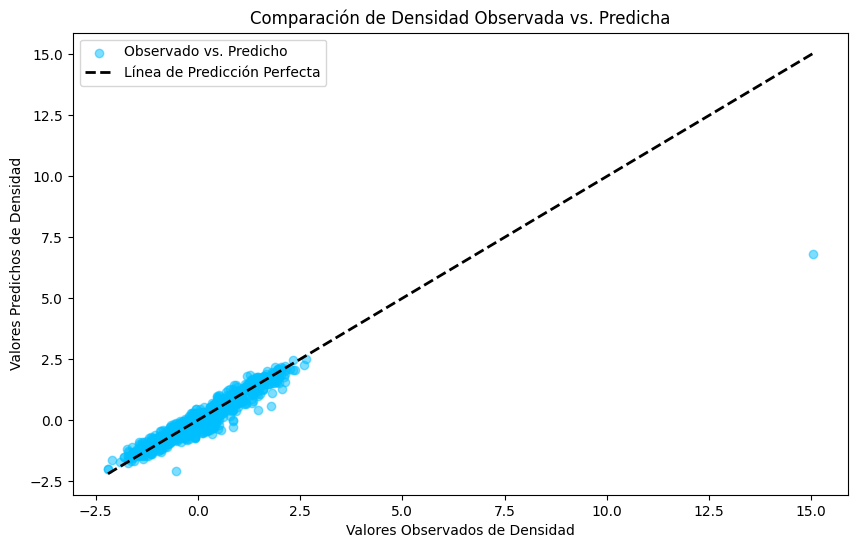

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_prediccion_test, alpha=0.5, color='deepskyblue', label='Observado vs. Predicho')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea de Predicción Perfecta')
plt.title('Comparación de Densidad Observada vs. Predicha')
plt.xlabel('Valores Observados de Densidad')
plt.ylabel('Valores Predichos de Densidad')
plt.legend()
plt.show()

## Conclusión Gráfico

Se observa que con la predicción de los valores de densidad, se ajustan a los muestrales dado que se tiene una agrupación de los datos y estan junto a la recta de regresión.

## Para la validación supuestos teoricos de los residuales:

TtestResult(statistic=0.9648274664456359, pvalue=0.3348694990435106, df=979)


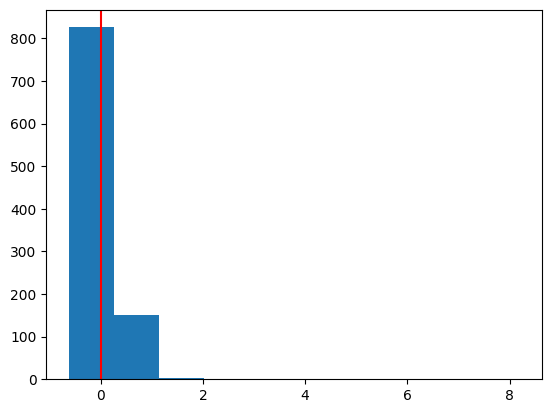

In [ ]:
residuales= y_test - y_prediccion_test

## 1) Media cero en los residales
from scipy.stats import ttest_1samp
## H0: E[e_i] = 0 vs H1: E[e_i] != 0
print(ttest_1samp(residuales, 0))

plt.hist(residuales)
plt.axvline(np.mean(residuales), color = "red")
plt.show()

#### Como p-valor = 0.33 > 0.05, con un nivel de significancia alfa = 0.05, no existe evidencia muestral suficiente para rechazar la hipotesis nula

### Media Igual a Cero

Como p-valor = 0.33 > 0.05, con un nivel de significancia alfa = 0.05, no existe evidencia muestral suficiente para rechazar la hipotesis nula

Shapiro-Wilk p-value: 4.035163874237107e-43
Kolmogorov-Smirnov p-value: 5.260187255048489e-84
Jarque-Bera p-value: 0.0
Anderson-Darling test statistic: 38.66564535530051
Nivel de significancia 15.0%: valor crítico = 0.574
Nivel de significancia 10.0%: valor crítico = 0.653
Nivel de significancia 5.0%: valor crítico = 0.784
Nivel de significancia 2.5%: valor crítico = 0.914
Nivel de significancia 1.0%: valor crítico = 1.088


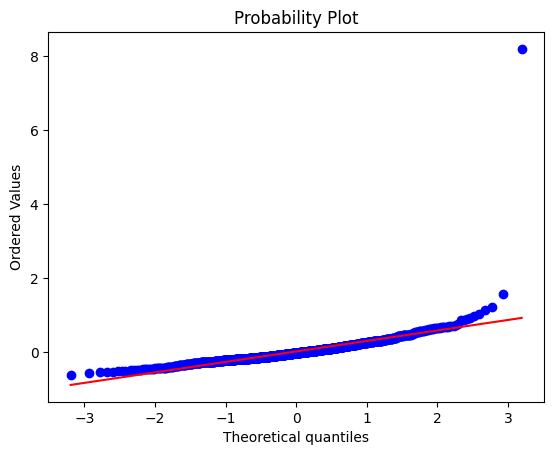

In [ ]:
# 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal

from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot
import pylab

shapiro_test = shapiro(residuales)
print(f"Shapiro-Wilk p-value: {shapiro_test[1]}")

ks_test = kstest(residuales, "norm")
print(f"Kolmogorov-Smirnov p-value: {ks_test[1]}")

jb_test = jarque_bera(residuales)
print(f"Jarque-Bera p-value: {jb_test[1]}")

anderson_test = anderson(residuales)
# Imprimir la estadística de la prueba
print(f"Anderson-Darling test statistic: {anderson_test.statistic}")
# Imprimir los valores críticos y su correspondiente nivel de significancia
for i in range(len(anderson_test.critical_values)):
    print(f"Nivel de significancia {anderson_test.significance_level[i]}%: valor crítico = {anderson_test.critical_values[i]}")

### Grafico QQ-plot para Normalidad
probplot(residuales, dist = "norm", plot = pylab)
plt.show()

## Normalidad:

1. Por Shapiro Wilks: Como p_valor < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5%, se rechaza la hipotesis nula por lo tanto suponemos que no hay normalidad en los datos. NO NORMALIDAD.

2. Por Kolmogorov-Smirnov: Como p_valor < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% EXISTE evidencia suficiente para  rechazar la hipotesis nula por lo tanto NO suponemos Normalidad en los datos. NO NORMALIDAD.

3. Por Anderson-Darling: Como es el estadistico de prueba 38.66 es mayor al estadistico critico 0.784, el estadistico de prueba cae en región de Rechazo, por lo tanto existe evidencia muestral suficiente para rechazar H0 y podemos suponer que no hay normalidad en los datos. NO NORMALIDAD.

4. Por Jarque-Bera: Como p_valor=0.0 < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% se rechaza la hipotesis nula por lo tanto suponemos que no hay normalidad en los datos. NO NORMALIDAD.

In [ ]:
### 3) Independencia en los residuales (Test de autocorrelacion)
from statsmodels.stats.stattools import durbin_watson
### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print(durbin_watson(residuales))

1.9109537247029897


## Autocorrelación:

Para evaluar la presencia de AUTOCORRELACIÓN, se utiliza el Durbin Watson donde un valor entre (1.5 - 2.5) significaria que no existiria pruebas suficientes para rechazar la hipotesis nulaH0 que seria la autocorrelación entre los datos.

De esta manera, Durbin Watson = 1.91 que esta contenido en el intervalo [1.5, 2.5] No existe suficiente evidencia muestral para rechazar la hipotesis nula por lo tanto supongo que los residuales son independientes.

 NO HAY AUTOCORRELACIÓN en los errores.

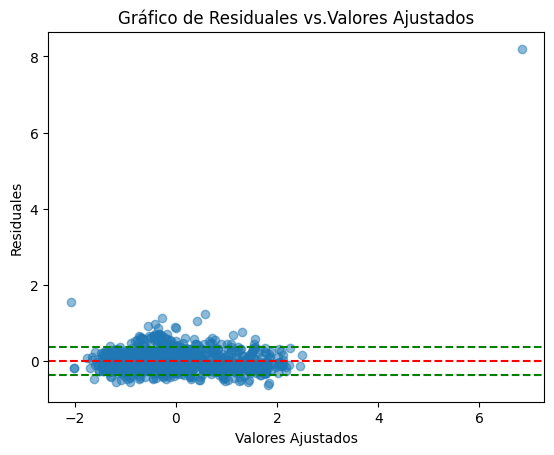

In [ ]:
### 4) Test de homocedasticidad

# Calcularladesviaciónestándardelosresiduos
std_residuos = np.std(residuales)
# Crearelgráficodedispersiónderesiduos
plt.scatter(y_prediccion_test,residuales,alpha=0.5)
plt.axhline(0, color='red', linestyle='--') # Líneaeny=0
plt.axhline(std_residuos,color='green', linestyle='--') # Líneasuperior
plt.axhline(-std_residuos, color='green', linestyle='--') # Líneainferior
plt.title('Gráfico de Residuales vs.Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.show()

## Homocedasticidad:

Se puede observar que no hay mucha dispersión en los datos, estan contenidos entre las lineas punteadas color verde, por tanto se podria asumir que los datos residuales cuentan con una varianza constante.

## Transformación a las variables:

Se trabaja transformando las variables Dióxido de Azúfre Libre y Acído Cítrico dado que en el modelo anterior eran las variables que no explicaban muy bien a la variable Densidad. Se relizaron transformaciones por metodo de raíz cuadrada y logaritmica para ambas variables pero arroja mejores resultados por el metodo de raíz cuadrada. Por último, se decide realizar la transformación a la variable Dióxido de Azúfre Libre dado que es la que muestra mas relevancia entre las dos variables respecto a Y. Es claro que no se le aplica transformación a ninguna otra variable dado que en el modelo original estan siendo relevantes y explicativas para Y, por tanto no se justifica cambiarlas pues podria afectar el modelo general. Se aplica la teoria de mejorar lo que esta "mal".

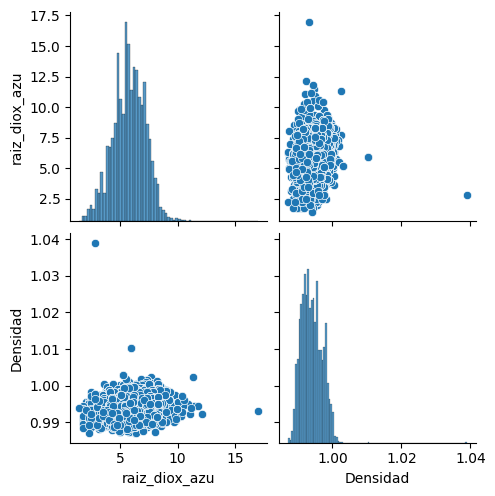

In [ ]:
datos['raiz_diox_azu'] = np.sqrt(datos['Dióxido de Azúfre Libre'])
#datos['raiz_acid_citri'] = np.sqrt(datos['Ácido Cítrico'])

#datos['exp_diox_azu'] = np.exp(datos['Dióxido de Azúfre Libre'])
#datos['log_diox_azu'] = np.log(datos['Dióxido de Azúfre Libre'])

revision=datos[['raiz_diox_azu','Densidad']]
#revision=datos[['raiz_acid_citri','Densidad']]
sns.pairplot(revision)
plt.show()

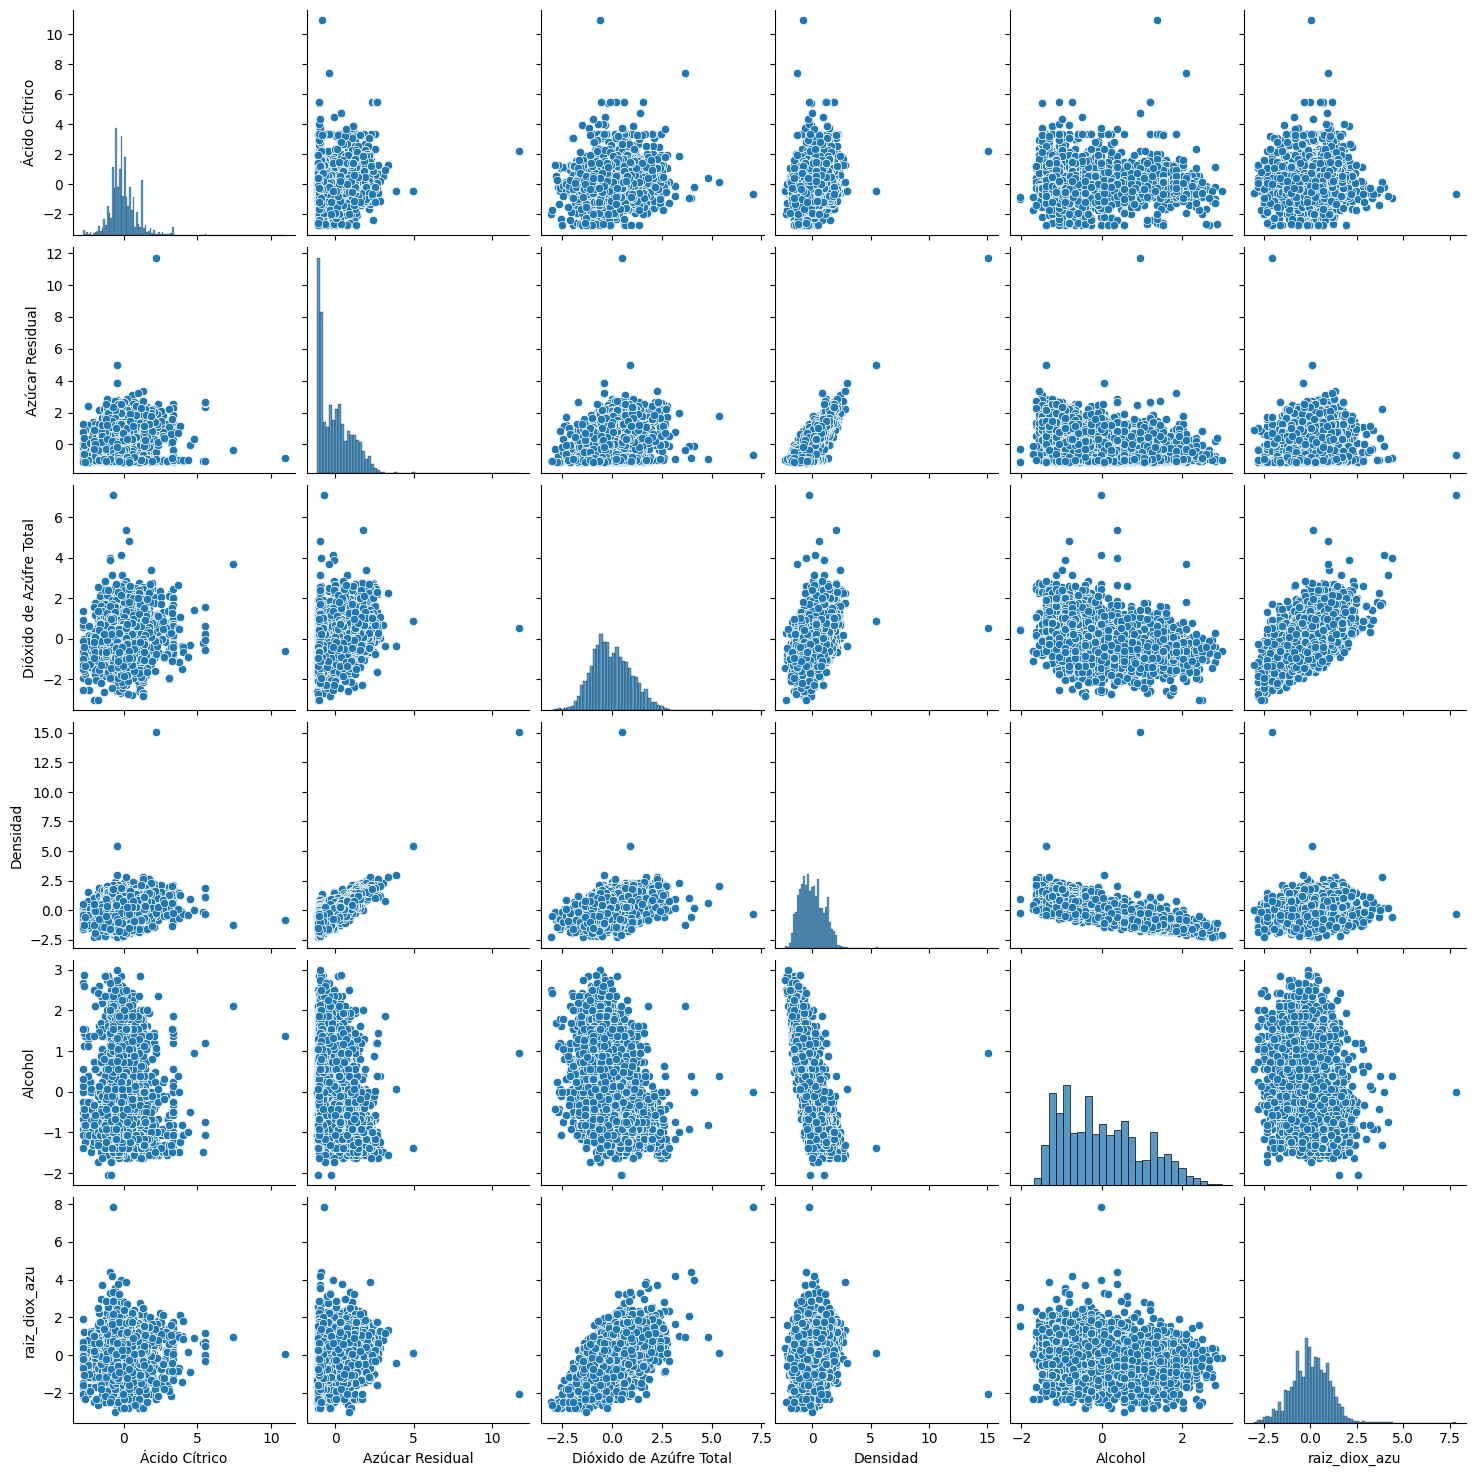

In [ ]:
scalar_trans= StandardScaler()
datos_estand_trans= pd.DataFrame(scalar.fit_transform(datos),columns=datos.columns)
datos_estand_trans=datos_estand_trans.drop(columns=['Dióxido de Azúfre Libre'])
#datos_estand_trans=datos_estand_trans.drop(columns=['Ácido Cítrico'])
sns.pairplot(datos_estand_trans)

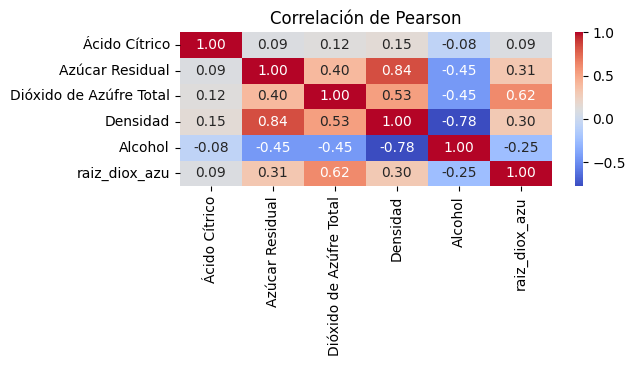

,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Total,Densidad,Alcohol,raiz_diox_azu
0,1.000000,0.094212,0.121131,0.149503,-0.075729,0.093811
1,0.094212,1.000000,0.401439,0.838966,-0.450631,0.311859
2,0.121131,0.401439,1.000000,0.529881,-0.448892,0.619406
3,0.149503,0.838966,0.529881,1.000000,-0.780138,0.298543
4,-0.075729,-0.450631,-0.448892,-0.780138,1.000000,-0.245194
5,0.093811,0.311859,0.619406,0.298543,-0.245194,1.000000


,Ácido Cítrico,Azúcar Residual,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,Alcohol
Ácido Cítrico,1.000000,0.094212,0.094077,0.121131,0.149503,-0.075729
Azúcar Residual,0.094212,1.000000,0.299098,0.401439,0.838966,-0.450631
Dióxido de Azúfre Libre,0.094077,0.299098,1.000000,0.615501,0.294210,-0.250104
Dióxido de Azúfre Total,0.121131,0.401439,0.615501,1.000000,0.529881,-0.448892
Densidad,0.149503,0.838966,0.294210,0.529881,1.000000,-0.780138
Alcohol,-0.075729,-0.450631,-0.250104,-0.448892,-0.780138,1.000000


In [ ]:
correlacion_pearson_trans = datos_estand_trans.corr(method='pearson').reset_index(drop=True)
plt.figure(figsize=(6, 2))
sns.heatmap(correlacion_pearson_trans, annot=True, fmt=".2f", cmap="coolwarm",xticklabels=datos_estand_trans.columns, yticklabels=datos_estand_trans.columns)
plt.title("Correlación de Pearson")
plt.show()

display(correlacion_pearson_trans)
display(correlacion_pearson)

In [ ]:
y_trans= datos_estand_trans['Densidad']
x_trans=datos_estand_trans.drop(columns='Densidad')

# Para hacer la división de los datos para entrenar y modelar 80/20 respectivamente.
x_trans_train, x_trans_test, y_trans_train, y_trans_test = train_test_split(x_trans, y_trans, test_size=0.2, random_state=0)

sigma_trans=datos_estand_trans.cov().values
sigma_trans[[-1, -4]] = sigma_trans[[-4, -1]] #moviendo las filas
sigma_trans[:, [-1, -4]] = sigma_trans[:, [-4, -1]]
sigmat_XX=sigma_trans[:-1, :-1]
sigmat_Xy=sigma_trans[-1, :-1]
display(sigma_trans)
display(sigmat_XX)
display(sigmat_Xy)

sigmat_XX_inv = np.linalg.inv(sigmat_XX)
sigmat_Xy=np.array(sigmat_Xy)
beta_sincero_trans= sigma_XX_inv @ sigma_Xy
beta_sincero_trans

me_Y_trans = y_trans_train.mean()
me_X_trans = x_trans_train.mean()
beta_cero_trans=me_Y_trans - me_X_trans @ beta_sincero_trans
display(beta_cero)

y_prediccion_test_trans= x_trans_test@beta_sincero_trans + beta_cero_trans
y_prediccion_test_trans

mse_trans= mean_squared_error(y_trans_test,y_prediccion_test_trans)
RMSE_trans= np.sqrt(mse_trans)
R2_trans= r2_score(y_trans_test, y_prediccion_test_trans)
print(f"El R cuadrado es igual a : {R2_trans}")
print(f"El error cuadratico medio es igual a : {mse_trans}")
print(f"La raíz del error cuadratico medio es igual a : {RMSE_trans}")
print("")
print("")

array([[ 1.00020421,  0.09423086,  0.09383019,  0.1495331 , -0.07574419,
         0.12115553],
       [ 0.09423086,  1.00020421,  0.31192268,  0.83913778, -0.45072324,
         0.40152129],
       [ 0.09383019,  0.31192268,  1.00020421,  0.29860365, -0.24524426,
         0.61953245],
       [ 0.1495331 ,  0.83913778,  0.29860365,  1.00020421, -0.78029693,
         0.52998953],
       [-0.07574419, -0.45072324, -0.24524426, -0.78029693,  1.00020421,
        -0.44898377],
       [ 0.12115553,  0.40152129,  0.61953245,  0.52998953, -0.44898377,
         1.00020421]])

array([[ 1.00020421,  0.09423086,  0.09383019,  0.1495331 , -0.07574419],
       [ 0.09423086,  1.00020421,  0.31192268,  0.83913778, -0.45072324],
       [ 0.09383019,  0.31192268,  1.00020421,  0.29860365, -0.24524426],
       [ 0.1495331 ,  0.83913778,  0.29860365,  1.00020421, -0.78029693],
       [-0.07574419, -0.45072324, -0.24524426, -0.78029693,  1.00020421]])

array([ 0.12115553,  0.40152129,  0.61953245,  0.52998953, -0.44898377])

-0.0022937733146299755

El R cuadrado es igual a : 0.14844481582109414
El error cuadratico medio es igual a : 0.9844603800282281
La raíz del error cuadratico medio es igual a : 0.9921997682060947




## Para la validación supuestos teoricos de los residuales (Transformados):

TtestResult(statistic=0.3098764279090662, pvalue=0.7567208758387564, df=979)


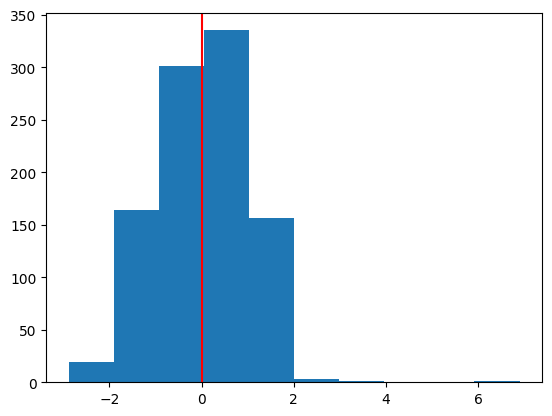

In [ ]:
residuales_trans= y_trans_test - y_prediccion_test_trans

## 1) Media cero en los residales
from scipy.stats import ttest_1samp
## H0: E[e_i] = 0 vs H1: E[e_i] != 0
print(ttest_1samp(residuales_trans, 0))

plt.hist(residuales_trans)
plt.axvline(np.mean(residuales_trans), color = "red")
plt.show()

#### Como p-valor = 0.75 > 0.05, con un nivel de significancia alfa = 0.05, no existe evidencia muestral suficiente para rechazar la hipotesis nula

## Media Igual Cero

Como p-valor = 0.75 > 0.05, con un nivel de significancia alfa = 0.05, no existe evidencia muestral suficiente para rechazar la hipotesis nula

Shapiro-Wilk p-value: 3.543255673134745e-11
Kolmogorov-Smirnov p-value: 0.05486420928010305
Jarque-Bera p-value: 1.1552062915197554e-23
Anderson-Darling test statistic: 2.772360412868011
Nivel de significancia 15.0%: valor crítico = 0.574
Nivel de significancia 10.0%: valor crítico = 0.653
Nivel de significancia 5.0%: valor crítico = 0.784
Nivel de significancia 2.5%: valor crítico = 0.914
Nivel de significancia 1.0%: valor crítico = 1.088


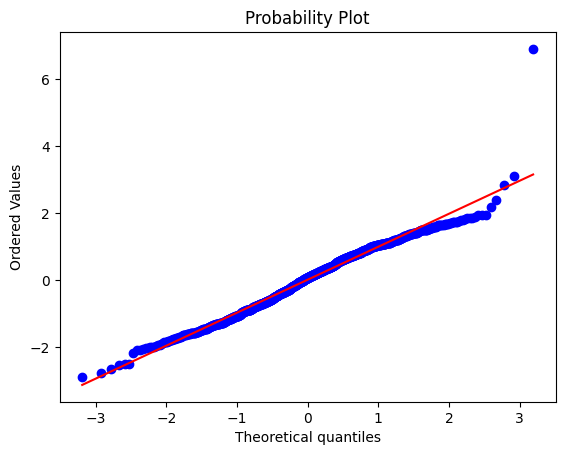

In [ ]:
# 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal

from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot
import pylab

shapiro_test_trans= shapiro(residuales_trans)
print(f"Shapiro-Wilk p-value: {shapiro_test_trans[1]}")

ks_test_trans= kstest(residuales_trans, "norm")
print(f"Kolmogorov-Smirnov p-value: {ks_test_trans[1]}")

jb_test_trans= jarque_bera(residuales_trans)
print(f"Jarque-Bera p-value: {jb_test_trans[1]}")

anderson_test_trans= anderson(residuales_trans)
# Imprimir la estadística de la prueba
print(f"Anderson-Darling test statistic: {anderson_test_trans.statistic}")
# Imprimir los valores críticos y su correspondiente nivel de significancia
for i in range(len(anderson_test_trans.critical_values)):
    print(f"Nivel de significancia {anderson_test_trans.significance_level[i]}%: valor crítico = {anderson_test_trans.critical_values[i]}")

### Grafico QQ-plot para Normalidad
probplot(residuales_trans, dist = "norm", plot = pylab)
plt.show()

## Normalidad:

1. Por Shapiro Wilks: Como p_valor < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5%, se rechaza la hipotesis nula por lo tanto suponemos que no hay normalidad en los datos. NO NORMALIDAD.

2. Por Kolmogorov-Smirnov: Como p_valor > $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% EXISTE evidencia suficiente para NO rechazar la hipotesis nula por lo tanto se podria suponer Normalidad en los datos. NORMALIDAD.

3. Por Anderson-Darling: Como es el estadistico de prueba 2.77 es mayor al estadistico critico 0.784, el estadistico de prueba cae en región de Rechazo, por lo tanto existe evidencia muestral suficiente para rechazar H0 y podemos suponer que no hay normalidad en los datos. NO NORMALIDAD.

4. Por Jarque-Bera: Como p_valor=0.0 < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% se rechaza la hipotesis nula por lo tanto suponemos que no hay normalidad en los datos. NO NORMALIDAD.

In [ ]:
### 3) Independencia en los residuales (Test de autocorrelacion)
from statsmodels.stats.stattools import durbin_watson
### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print(durbin_watson(residuales_trans))

2.0873442093236525


## Autocorrelación:

Para evaluar la presencia de AUTOCORRELACIÓN, se utiliza el Durbin Watson donde un valor entre (1.5 - 2.5) significaria que no existiria pruebas suficientes para rechazar la hipotesis nulaH0 que seria la autocorrelación entre los datos.

De esta manera, Durbin Watson = 2.08 que esta contenido en el intervalo [1.5, 2.5] No existe suficiente evidencia muestral para rechazar la hipotesis nula por lo tanto supongo que los residuales son independientes.

 NO HAY AUTOCORRELACIÓN en los errores.

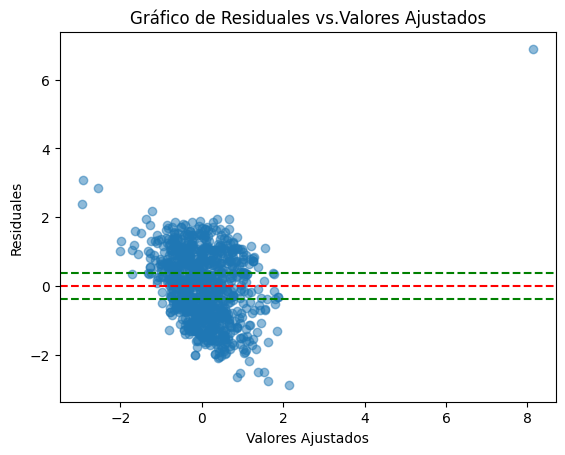

In [ ]:
### 4) Test de homocedasticidad

# Calcularladesviaciónestándardelosresiduos
std_residuos_trans= np.std(residuales_trans)
# Crearelgráficodedispersiónderesiduos
plt.scatter(y_prediccion_test_trans,residuales_trans,alpha=0.5)
plt.axhline(0, color='red', linestyle='--') # Líneaeny=0
plt.axhline(std_residuos,color='green', linestyle='--') # Líneasuperior
plt.axhline(-std_residuos, color='green', linestyle='--') # Líneainferior
plt.title('Gráfico de Residuales vs.Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.show()

## Homocedasticidad:

Se puede observar que hay mucha dispersión en los datos, salen de las líneas punteadas color verde, por tanto no se podria asumir que los residuales cuentan con una varianza constante.

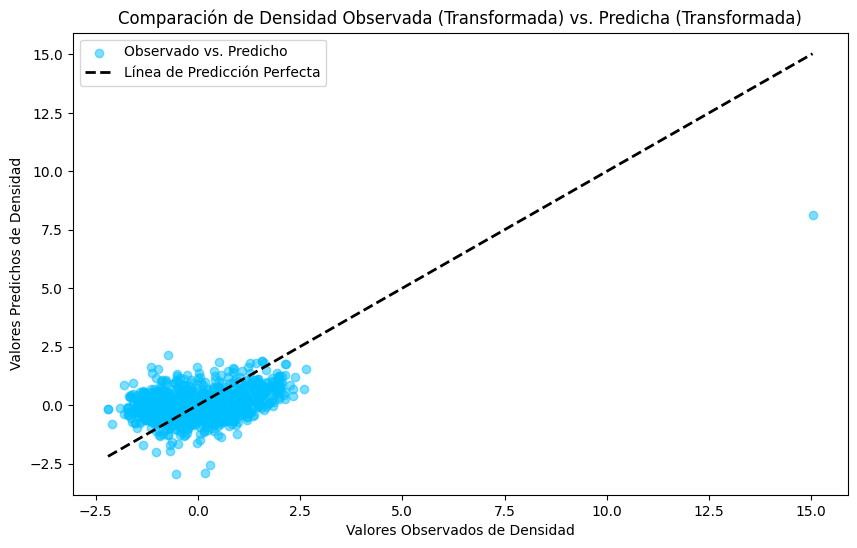

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_trans_test, y_prediccion_test_trans, alpha=0.5, color='deepskyblue', label='Observado vs. Predicho')
plt.plot([y_trans_test.min(), y_test.max()], [y_trans_test.min(), y_trans_test.max()], 'k--', lw=2, label='Línea de Predicción Perfecta')
plt.title('Comparación de Densidad Observada (Transformada) vs. Predicha (Transformada)')
plt.xlabel('Valores Observados de Densidad')
plt.ylabel('Valores Predichos de Densidad')
plt.legend()
plt.show()

## Conclusión Gráfico

Se observa que con la transformación de la raiz cuadrada a la variable Dióxido Azufre Libre, no se logra generar un mejor impacto en el modelo como se tenia con sin ningúna transformación.

**PUNTO 4.**

In [ ]:
# Especificar la ruta completa del archivo
df2 = "publicidad.csv"

# Cargar el archivo CSV
datospublicidad = pd.read_csv(df2)

# Si hay una columna no nombrada "Unnamed: 0", la renombramos o eliminamos
# Renombrar la columna "Unnamed: 0" a "Índice" (si existe)
if 'Unnamed: 0' in datospublicidad.columns:
    datospublicidad = datospublicidad.rename(columns={"Unnamed: 0": "Índice"})

# Eliminar la columna "Índice" (si existe)
if 'Índice' in datospublicidad.columns:
    datospublicidad = datospublicidad.drop(columns={"Índice"})

# Mostrar las primeras filas para verificar los cambios
print(datospublicidad.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


El conjunto de datospublicidad consta de 200 observaciones y 4 variables cuantitativas, no hay datos nulos. En promedio, el gasto en publicidad en TV (en miles de dólares) es mayor en comparación con los otros dos medios (147), lo que puede indicar una tendencia a invertir más en publicidad TV. Por otro lado, en promedio, el gasto en publicidad en Radio (en miles de dólares) es el menor de todos (23).

In [ ]:
datospublicidad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


 **4.1**. Graficar el retorno de inversión (variable “Sales”) vs la cantidad de anuncios publicitarios por canal (“TV”, “Radio”, “Newspaper”). Para ello use la función scatter_matrix() del paquete pandas e interprete los graficos de las variables dos a dos, teniendo en cuenta que nuestra variable respuesta es “Sales”.

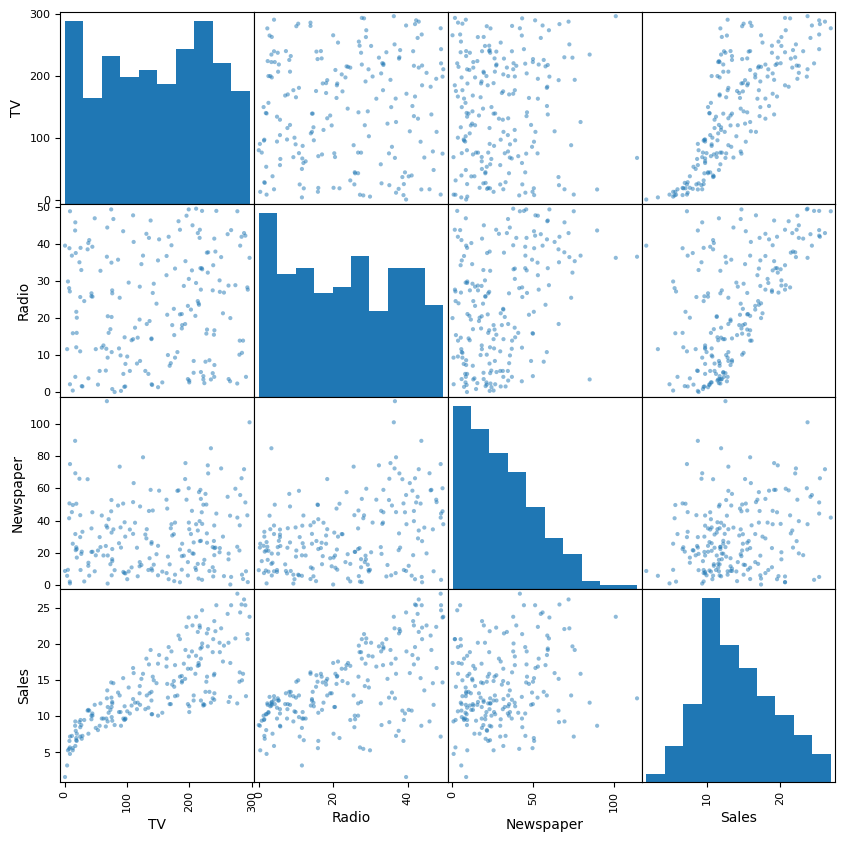

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Crear la matriz de dispersión (scatter matrix)
scatter_matrix(datospublicidad, figsize=(10, 10))
plt.show()

De acuerdo con el gráfico:

Sales - TV : Se observa una relación lineal positiva al parecer fuerte entre las dos variables, lo que sugiere que, a medida que aumenta X (gasto en publicidad en TV (en miles de dólares)) aumenta Y (Número de unidades vendidas (en miles)), impacto significativo en las ventas.

Sales - Radio: Se observa una correlación positiva, pero menos fuerte, debido a que presenta mayor dispersión la relación entre las dos variables. Es decir, el gasto en publicidad en Radio (en miles de dólares) contribuye a un aumento en el número de unidades vendidas (en miles), pero en menor fuerza comparado con el efecto de Sales-TV.

Sales-Newspaper: Se observa una relación mucho menos clara entre las dos variables (mucha dispersión), lo que sugiere una relación poco clara o inexistente entre el gasto en publicidad en Newspaper (en miles de dólares) y el número de unidades vendidas (en miles).

------------------------------------------------------------------------------------------------------------------------------------------------------------

Relaciones X-X: No se observa correlación entre las variables X (Radio-TV), (TV-Newspaper), (Newspaper-Radio), por tanto, no hay indicios de multicolinealidad. Los datos se encuentran bastante dispersos, lo que sugiere que el gasto en publicidad es independiente según el medio.

**4.2.** Calcular el coeficiente de correlación entre todas las variables y mediante un mapa de calor represente estas correlaciones. ¿Interprete las estructuras de dependencia encontradas?

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


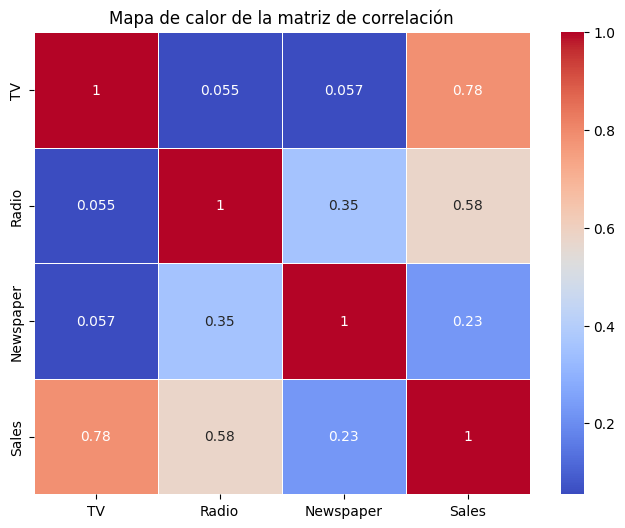

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación entre todas las variables
corr_matrix = datospublicidad.corr()

# Mostrar la matriz de correlación
print(corr_matrix)

# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

De acuerdo con el gráfico:

Sales-TV: Correlación fuerte positiva entre las variables Sales y TV (0.78). Sugiere un impacto significativo en las ventas.

Sales-Radio: Correlación moderada positiva entre las variables Sales y Radio (0.58).Parece contribuir en las ventas, pero en menor medida que TV.

Sales-Newspaper: Correlación débil positiva entre las variables Sales y Newspaper (0.23).Impacto limitado en las ventas.

--> Dada la alta correlación de la variable TV, se elige como variable explicativa para modelar las ventas ("Sales")

------------------------------------------------------------------------------------------------------------------------------------------------------------
TV-Radio (0.055), TV-Newspaper (0.057), Radio-Newspaper (0.35): Correlaciones muy débiles positivas entre los medios, lo que sugiere que no están relacionados entre sí.

**4.3.** Teniendo en cuenta el punto anterior, elija solo una variable explicativa (“TV”, “Radio”, o “Newspaper”; la más conveniente) para modelar las ventas (“Sales”), ajuste el modelo de regresión lineal simple y encuentra la ecuación de la recta. ¿Cuál es el valor del coeficiente de determinación R2? ¿Cómo se interpreta este valor?

Sales=β0+β1⋅TV
β0: Intercepto.

𝛽1: Coeficiente de la variable explicativa (TV)

In [ ]:
import statsmodels.api as sm

# Definir las variables dependiente e independiente
X = datospublicidad['TV']
y = datospublicidad['Sales']

# Agregar una constante al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal simple
modelo = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        23:10:06   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

La ecuación de la recta es **Sales= 7.0326 + 0.0475 * TV**

β0: Intercepto: 7.0. Indica el valor de Y cuando X=0, es decir, cuando el gasto en publicidad en televisión (en miles de dólares) = 0, el valor de Y (Número de unidades vendidas (en miles)) = 7.0.

𝛽1: Coeficiente de la variable explicativa (TV):  0.05. Cambio esperado en Y por cada unidad de cambio en X. Ante un incremento de mil dólares adicionales (Variable gasto en publicidad en TV está medida en miles de dólares), el número de unidades vendidas (miles) aumenta en 0.0475  --> 47.5 unidades. Esta variable es estadísticamente significativa dado que su pvalor es 0.00 < alpha 0.05

R2:0.612. Indica que el modelo de regresión lineal simple con TV como variable explicativa explica el 61,2%, es decir que, el gasto en publicidad en televisión (en miles de dólares) explica con un buen ajuste la variabilidad en el número de unidades vendidas (miles).



**Supuestos**

Estadístico t: -2.9986951223839055e-14, p-valor: 0.9999999999999761


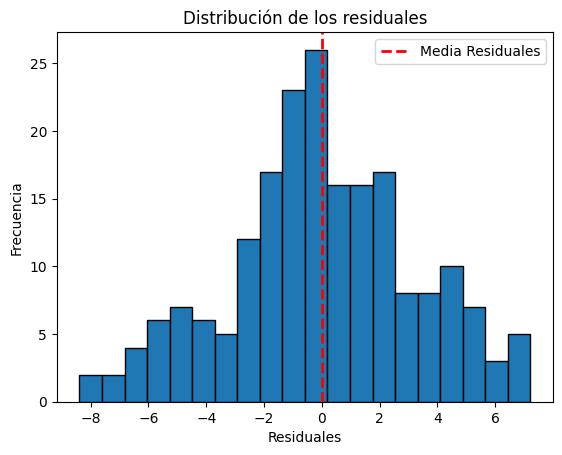

In [ ]:
# Calcular los residuales
residuales = modelo.resid

# 1) Media cero en los residuales
# H0: E[e_i] = 0 vs H1: E[e_i] != 0
t_stat, p_value = ttest_1samp(residuales, 0)
print(f"Estadístico t: {t_stat}, p-valor: {p_value}")

# Visualización de la distribución de los residuales
plt.hist(residuales, bins=20, edgecolor='black')
plt.axvline(np.mean(residuales), color='red', linestyle='dashed', linewidth=2, label='Media Residuales')
plt.title('Distribución de los residuales')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Como p-valor = 1 > 0.05, con un nivel de significancia alfa = 0.05, no existe evidencia muestral suficiente para rechazar la hipotesis nula # H0: E[e_i] = 0

ShapiroResult(statistic=0.9905306561484956, pvalue=0.2133255143672237)
KstestResult(statistic=0.25587740364525224, pvalue=4.933781652594953e-12, statistic_location=1.653421094227804, statistic_sign=-1)
AndersonResult(statistic=0.49121060466279687, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-6.892264536872972e-15, scale=3.2504584780062906)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
SignificanceResult(statistic=0.6688077048615629, pvalue=0.715764660551861)


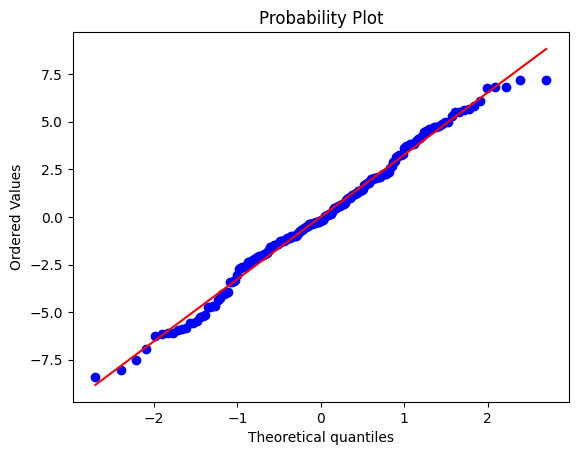

In [ ]:
## 2) Normalidad
### H0: e_i~Normal vs H1: e_i !~ Normal
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot
import pylab

print(shapiro(residuales))
print(kstest(residuales, "norm"))
print(anderson(residuales))
print(jarque_bera(residuales))

### Grafico QQ-plot para Normalidad
probplot(residuales, dist = "norm", plot = pylab)
plt.show()

NORMALIDAD: Por Shapiro Wilks: Como pvalor=0.21 > $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% no existe evidencia suficiente para  rechazar la hipotesis nula por lo tanto suponemos Normalidad en los datos.

NO NORMALIDAD: Por Kolmogorov-Smirnov: Como pvalor < $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% existe evidencia suficiente para  rechazar la hipotesis nula por lo tanto NO suponemos Normalidad en los datos.

NORMALIDAD: Por Anderson-Darling: Como el estadístico de prueba 0.49 es menor al estadistico critico 0.77, el estadistico de prueba cae en región de NO Rechazo, por lo tanto no existe evidencia muestral suficiente para rechazar H0 y podemos suponer Normalidad en los datos.

NORMALIDAD: Por Jarque-Bera: Como pvalor=0.061 > $\alpha$ donde $\alpha=0.05$, con un nivel de significancia del 5% no existe evidencia suficiente para  rechazar la hipotesis nula por lo tanto suponemos Normalidad en los datos.

1.9346885372823601


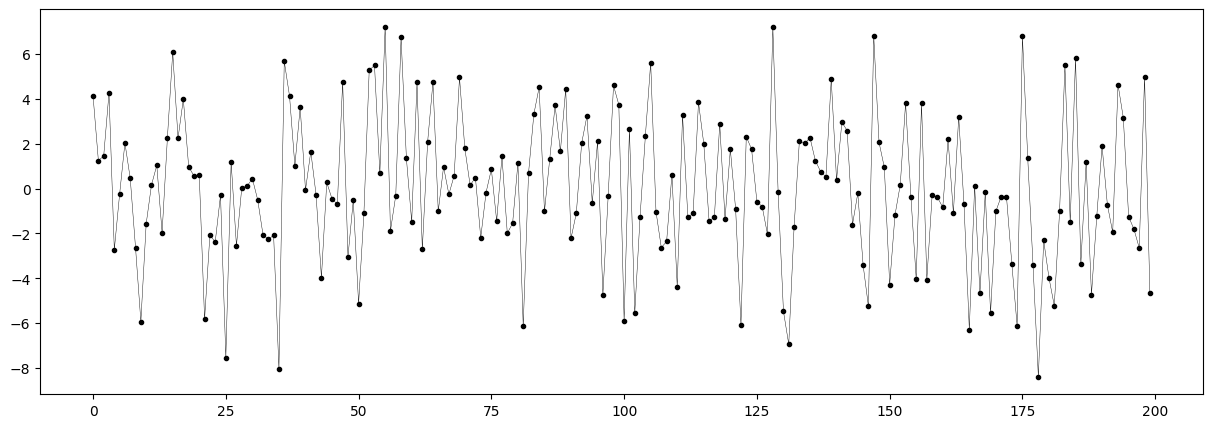

In [ ]:
### 3) Independencia en los residuales (Test de autocorrelacion)
from statsmodels.stats.stattools import durbin_watson
### H0: Corr(e_i, e_i+1) = 0 vs H1: Corr(e_i, e_i+1) != 0
print(durbin_watson(residuales))
### Interpretación: Si el valor DW esta en el intervalo [1.5, 2.5] No rechazo la hipotesis nula
### En caso contrario si DW < 1.5 O DW > 2.5 se rechaza H0.

plt.figure(figsize = (15, 5))
plt.plot(residuales, '.-', color = "black", linewidth = 0.3)

Como DW= 1.93 cae dentro del rango [1.5, 2.5], indica que no hay suficiente evidencia para rechazar la hipótesis nula de independencia de los residuos. Por lo tanto, los residuos no presentan autocorrelación, es decir, son independientes.

In [ ]:
### 4) Test de homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
### H0: V[e_i] = cte vs H1: V[e_i] != cte

het_breuschpagan(residuales, sm.add_constant(X))

(48.037965662293615,
 4.1804559077556965e-12,
 62.591404771514306,
 1.7618451425695673e-13)

Como el p-valor (4.18 e-12) es < alfa, donde alfa=0.05, con un nivel de significancia del 5%, existe evidencia muestral suficiente para rechazar la hipotesis nula, es decir, los residuales no tienen varianza constante.

**4.4** Realiza una predicción del retorno de inversión esperado cuando se realizan 5 anuncios por el canal de la variable escogida en el ítem anterior. ¿Cuál es el intervalo de confianza del 95% para la predicción?

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Definir las variables dependiente e independiente
X = datospublicidad['TV']
y = datospublicidad['Sales']

# Agregar una constante al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal simple
modelo = sm.OLS(y, X).fit()

# Realizar la predicción para 5 anuncios de TV
nuevos_datos = pd.DataFrame({'const': 1, 'TV': [5]})
prediccion = modelo.get_prediction(nuevos_datos)

# Obtener el retorno esperado y el intervalo de confianza del 95%
prediccion_resumen = prediccion.summary_frame(alpha=0.05)

# Obtener el retorno esperado y el intervalo de confianza del 95%
prediccion_resumen = prediccion.summary_frame(alpha=0.05)

# Renombrar las columnas
prediccion_resumen.rename(columns={'mean': 'valor_esperado', 'mean_ci_lower': 'valor_min', 'mean_ci_upper': 'valor_max'}, inplace=True)

# Mostrar el resultado de la predicción
print(prediccion_resumen[['valor_esperado', 'valor_min', 'valor_max']])

   valor_esperado  valor_min  valor_max
0        7.270277   6.390226   8.150327


Recordar que: Gastos en publicidad están en miles de dólares y las ventas en miles de unidades.

El retorno de inversión esperado cuando se realizan 5 anuncios por el canal TV es de 7.27. El límite inferior del intervalo de confianza del 95% es de 6.39 y el máximo intervalo de confianza del 95% es de 8.15. -->Con un gasto de 5 mil dólares en gastos en publicidad TV, las ventas estimadas están entre 6.390 dólares y 8.150 unidades, con un 95%.

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Definir las variables dependiente e independiente
X = datospublicidad['TV']
y = datospublicidad['Sales']

# Agregar una constante al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal simple
modelo = sm.OLS(y, X).fit()

# Realizar la predicción para 5 anuncios de TV
nuevos_datos = pd.DataFrame({'const': 1, 'TV': [78.2]})
prediccion = modelo.get_prediction(nuevos_datos)

# Obtener el retorno esperado y el intervalo de confianza del 95%
prediccion_resumen = prediccion.summary_frame(alpha=0.05)

# Obtener el retorno esperado y el intervalo de confianza del 95%
prediccion_resumen = prediccion.summary_frame(alpha=0.05)

# Renombrar las columnas
prediccion_resumen.rename(columns={'mean': 'valor_esperado', 'mean_ci_lower': 'valor_min', 'mean_ci_upper': 'valor_max'}, inplace=True)

# Mostrar el resultado de la predicción
print(prediccion_resumen[['valor_esperado', 'valor_min', 'valor_max']])


   valor_esperado  valor_min  valor_max
0       10.749959  10.166949  11.332968


Se realiza una prueba con un valor real: cuando X:78.2 Y:14.6


El retorno de inversión esperado cuando se realizan 78.2 anuncios por el canal TV es de 10.7. El límite inferior del intervalo de confianza del 95% es de 10.2 y el máximo intervalo de confianza del 95% es de 11.3. -->Con un gasto de 78.2 mil dólares en gastos en publicidad TV, las ventas estimadas están entre 10.166 dólares y 11.333 unidades, con un 95%.

Sin embargo, este valor difiere del valor real que es 14.6. Esto puede ocurrir debido a la presencia de heterocedasticidad, es decir, que los residuos no tienen una varianza constante y por tanto las predicciones pueden ser menos precisas.